In [50]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
from typing import Final 
import h5py
import matplotlib.pyplot as plt
import time 
import xarray as xr
from utils import plot_bias
import gc 


In [51]:
sfc_vars_remove = (17, 18, 19, 20, 21)

save_dir = "/data/climsim-online/shared_e3sm/saved_models/wrapper_ftorch/"
data_path = "/data/ClimSim/hu_etal2024_data/"
grid_path = '../grid_info/ClimSim_low-res_grid-info.nc'

grid_info = xr.open_dataset(grid_path)
level = grid_info.lev.values
nlev = level.shape[0]

hyam = torch.from_numpy(np.float32(grid_info['hyam'].values))
hybm = torch.from_numpy(np.float32(grid_info['hybm'].values))


In [62]:
fdir_bsc = "/media/peter/CrucialBX500/data/BSC_mount/ClimSim/rnn/saved_models/"
model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_yv4_num2515_ep79_val0.0489_script.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, True, 16, 60, False

model_path_script = "saved_models/LSTM-Hidden_lr0.001.neur128-128_xv4_yv5_num25949_script_cuda.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, True, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_yv4_num36534_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, False, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num62905_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, False, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num51230_script_cpu.pt" 
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, False, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num88067_script_cpu.pt" 
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

model_path_script = fdir_bsc + "SRNN-Hidden_lr0.0007.neur144-144_xv4_mp0_num72844_script_cpu.pt"  # ar1_0.7
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-144_xv4_mp0_num70753_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

rh_prune = True


# new CRPS
# 40289
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num94940_script_cpu.pt"
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num35215_script_cpu.pt" #ens3
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# newCRPS noprevt
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num1814_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num49489_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# old CRPS

model_path_script = "saved_models/SRNN-Hidden_lr0.0007.neur144-144_xv4_mp0_num72844_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# mp1 physprec  noprecloss
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp1_num46497_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  only 6 epochs
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num95044_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  only 6 epochs
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num95044_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# ens3_prevprec_srules-CRPS-sumvar_partiallystochastic_SLSTM4-144-96_..123344..10_hcon2e-3_wcon5e9
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num49489_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 18, 60, False

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num45236_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 18, 60, False

# det, ymem=mixed 
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num23016_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num82966_script_cpu.pt" #
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 18, 60, False

# ens3 noprevy
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.001.neur160-96_xv4_mp0_num55005_script_cpu.pt" #
#qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 60, False, False
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num30754_script_cpu.pt" #

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num50592_script_cpu.pt" #
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 60, False, True
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num14122_script_cpu.pt" #
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num52190_script_cpu.pt"

# ens5 noprevy
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num34142_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 60, False, False
# ens4 noprevy biasloss
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num20693_script_cpu.pt"

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num49330_script_cpu.pt"
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num98918_script_cpu.pt"
# cont 49330
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num97969_script_cpu.pt"

# ep16 noprevy-sfcmem,soap,ens6_srules-CRPS-sumvar_partstoch_SLSTM4-160-128_hcon2e-3_wcon2e10(tstep=1)_wbias5e3_122..8
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num92127_script_cpu.pt"

# strangely good CRPS-mean model thats not really stochastic (but no hcon, wcon)
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num21746_script_cpu.pt"

# det, ymem=mixed LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num51981.pt ep14
#qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 50, False, True
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num51981_script_cpu.pt"
# nlev_mem = 50, needs to be changed in src code
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num70730_script_cpu.pt" # cont

# cont_LSTM160-144_mp0_huber_TrReplay=Mixed,valreplay=full   NO WCON,ECON
qinput_prune, snowhice_fix, v5_input, nlev_mem, perturb, rh_prune = True, True, False,  60, False, False
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num2840_script_cpu.pt" 
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num30315_script_cpu.pt" 
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num7886_script_cpu.pt" 

 # partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num26724.pt
qinput_prune, snowhice_fix, v5_input, nlev_mem, perturb, rh_prune = True, True, False,  60, False, False
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num26724_script_cpu.pt" 
# noprevy,soap,ens6_srules-esfair_partstoch_SLSTM4-160-128_122..8
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num89569_script_cpu.pt"
# noprevy_ens6_srules-esfair_partstochastic_SLSTM4-160-128_..122..8_hcon2e-3_wcon1e10(tstep=1),sfcmem,ep12
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num93593_script_cpu.pt"

# noprevy,soap,ar2_ens4_srules-CRPS-sumvar_partstoch_SLSTM3-144-128_122..8_hcon2e-3_wcon2e10_wprec6e16
#     use_surface_memory=true \
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-128_xv4_mp0_num666_script_cpu.pt"
# same, ar0
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-128_xv4_mp0_num36798_script_cpu.pt"
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-128_xv4_mp0_num57011_script_cpu.pt"
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-128_xv4_mp0_num96931_script_cpu.pt"

# cont_LSTM144-144-seprad96_mp0_2xwcon-xtime,hcon_1233..12,tr=mixed,val=fullreplay,hcon6e-6_wcon2e7_wbias4e-1_wprec1.2e14  53 ep!!!
#qinput_prune, snowhice_fix, v5_input, nlev_mem, perturb, rh_prune = True, True, False, 50, False, False
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num45231_script_cpu.pt"
# LSTM160-160-seprad96_mp0_2xwcon-xtime,hcon_1233..10,tr=mixedGradual40,val=fullreplay,hcon6e-6_wcon2e7_wbias4e-1_wprec1.2e14
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-160_xv4_mp0_num16137_script_cpu.pt" # ep67

qinput_prune, snowhice_fix, v5_input, nlev_mem, perturb, rh_prune = True, True, False, 60, False, False
# cont_LSTM160-144_mp0_huber_TrReplay=MixedGradual40,valreplay=full
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num90583_script_cpu.pt" # ep42
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-128_xv4_mp0_num67201_script_cpu.pt"
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-128_xv4_mp0_num86002_script_cpu.pt" # ep26
# cont_cont_soap,ens4_srules-CRPS-sumvar_partstoch_SLSTM4-144-128_122..8_hcon2e-3_wcon2e10_wprec6e16
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-128_xv4_mp0_num35769_script_cpu.pt"

#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num22734_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num36991_script_cpu.pt"
# randinitLSTM144-144_mp0_huber_TrReplay=Mixed,valreplay=full
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num2647_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num75291_script_cpu.pt"

model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num89909_script_cpu.pt" # ep3
# 
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num75291_script_cpu.pt"#ep43
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num41203_ep83_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num41203_script_cpu.pt"
model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur144-144_xv4_mp0_num46676_script_cpu.pt"
model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur144-144_xv4_mp0_num66342_script_cpu.pt"
model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur144-144_xv4_mp0_num88345_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num24008_script_cpu.pt"

#fulldata_ens3_srules-CRPS-sumvar_perturbSGRU4-128-128_122..3_hcon2e-3_wcon2e10_wprec6e16_wbias5e3  ep 6
#qinput_prune, snowhice_fix, v5_input, nlev_mem, perturb, rh_prune = True, True, False,  60, True, False
#model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur128-128_xv4_mp0_num1138_script_cpu.pt" #
# ens4_srules-CRPS-sumvar_perturbSGRU4-128-128_122..8_hcon2e-3_wcon2e10_wprec6e16_wbias5e3
#model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur128-128_xv4_mp0_num11021_script_cpu.pt" # ep12
# fulldata_ens3_srules-CRPS-sumvar_perturbSGRU4-128-128_122..3_wcon2e10_wprec6e16_wbias5e3
#model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur128-128_xv4_mp0_num1922_script_cpu.pt" # ep9
# NODETLOSS_ens4_srules-CRPS-esfair_perturbSGRU4-128-128_122..8_hcon1.2e-3_wcon8e9_wprec2.5e16_wbias1.2e2  ep8
#model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur128-128_xv4_mp0_num23947_script_cpu.pt"
# NODETLOSS_ens4_srules-CRPS-esfair_perturbSGRU4-128-128_122..8_wcon8e9_wbias1.2e2   ep8
#model_path_script = "saved_models/LSTM_autoreg_torchscript_perturb-Hidden_lr0.0007.neur128-128_xv4_mp0_num38838_script_cpu.pt"


# new autoreg no prevt      ep2
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num3348_script_cpu.pt"

#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num18294_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num346_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num79861_script_cpu.pt"
#rh_to_q = True
rh_to_q = False

# yuval mp with liqfrac bug, pred = 0 but constrained +-0.2 within diagnosed
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur128-128_xv4_mp-1_num72916_script_cpu.pt"
# yuval mp with liqfrac fixed
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur128-128_xv4_mp-1_num41931_script_cpu.pt"

#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num60869_script_cpu.pt"
# fixed "everything?" ep1
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num93962_script_cpu.pt"
# not quite..new attempt with capped evap=precstore, ep1
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num83443_script_cpu.pt"
# nope. now without sedimentation
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num68561_script_cpu.pt"

#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num94371_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num18809_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num28119_script_cpu.pt"
# lossw+mp-1_sedm-norelu(orprec)_NOevapprec_TENDFIX_LSTM144_prevt_liqfrachubase+fix_std1-CONDMLPlfrac
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num66650_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num36495_script_cpu.pt"
# +hcon
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-160_xv4_mp-1_num67093_script_cpu.pt"
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur128-128_xv4_mp-1_num53322_script_cpu.pt"

model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur128-128_xv4_mp-1_num22090_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur128-128_xv4_mp-1_num14190_script_cpu.pt"

model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-2_num68811_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-2_num27072_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-2_num20905_script_cpu.pt"

model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num93007_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-2_num73279_script_cpu.pt"

model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num72293_script_cpu.pt"


In [63]:
return_det = False # only valid for perturbation models

In [64]:
mp_mode = int(model_path_script.split('mp')[-1][0:3].split('_')[0])

print("mp_mode: {}".format(mp_mode))

if mp_mode==0: # predict qliq, qice
    mp_constraint = False 
    pred_liq_ratio = False
elif mp_mode>0: # predict qn, DIAGNOSE liquid fraction
    mp_constraint = True 
    pred_liq_ratio = False
else: # < 0  predict qn and liquid fraction
    mp_constraint = True       
    pred_liq_ratio = True 

    
print(model_path_script)
if "stochastic" in model_path_script or "SRNN" in model_path_script or "perturb" in model_path_script:
    nens=5
    print("Model is stochastic")
else:
    nens=1
    print("Model is deterministic") 
    
if "gpu" in model_path_script or "cuda" in model_path_script:
    use_gpu = True 
else:
    use_gpu = False 
    
model = torch.jit.load(model_path_script)

try:
    use_ar_noise = model.use_ar_noise
    print("use_ar_noise IS defined in model, setting to {}".format(use_ar_noise))
except:
    print("use_ar_noise not defined in model, setting to false")
    use_ar_noise = False

nmem = model.nh_mem
nlev_mem = model.nlev_mem
print("nmem:", nmem)

#if mp_mode==-2:
if model.physical_precip:
    include_raw_inputs=True 
else:
    include_raw_inputs=False
    
print("include raw inputs:", include_raw_inputs)

mp_mode: -1
saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num72293_script_cpu.pt
Model is deterministic
use_ar_noise not defined in model, setting to false
nmem: 16
include raw inputs: True


In [65]:
model.physical_precip

True

In [66]:
if model.xmean_lev[50,0]==model.xmean_lev[59,0]:
    input_norm_per_level = False 
    output_norm_per_level = False 
    from norm_coefficients import lbd_qc_mean, lbd_qi_mean, lbd_qn_mean
    lbd_qc = lbd_qc_mean
    lbd_qi = lbd_qi_mean
    lbd_qn = lbd_qn_mean
else:
    input_norm_per_level = True 
    output_norm_per_level = True
    from norm_coefficients import lbd_qc_lev, lbd_qi_lev, lbd_qn_lev
    lbd_qc = lbd_qc_lev
    lbd_qi = lbd_qi_lev
    lbd_qn = lbd_qn_lev
    
print("Deduced input_norm_per_level: {}".format(input_norm_per_level))

Deduced input_norm_per_level: False


In [67]:
# --- PyTorch implementations ---
def torch_polyval(coeffs, x):
    """Evaluate polynomial (coeffs in same order as numpy.polyval) using Horner's method."""
    out = torch.zeros_like(x, dtype=coeffs.dtype)
    for c in coeffs:
        out = out * x + c
    return out

def eliq_torch(T):
    """T: torch tensor (K). Returns saturation (hPa scaled by 100 as in original)."""
    a_liq = torch.tensor([-0.976195544e-15, -0.952447341e-13, 0.640689451e-10,
                          0.206739458e-7, 0.302950461e-5, 0.264847430e-3,
                          0.142986287e-1, 0.443987641, 6.11239921], dtype=T.dtype, device=T.device)
    c_liq = -80.0
    T0 = 273.16
    x = torch.clamp(T - T0, min=c_liq)  # equivalent to np.maximum(c_liq, T-T0)
    return 100.0 * torch_polyval(a_liq, x)

def eice_torch(T):
    a_ice = torch.tensor([0.252751365e-14, 0.146898966e-11, 0.385852041e-9,
                          0.602588177e-7, 0.615021634e-5, 0.420895665e-3,
                          0.188439774e-1, 0.503160820, 6.11147274], dtype=T.dtype, device=T.device)
    c_ice = torch.tensor([273.15, 185.0, -100.0, 0.00763685, 0.000151069, 7.48215e-07],
                         dtype=T.dtype, device=T.device)
    T0 = 273.16

    cond1 = (T > c_ice[0])
    cond2 = ((T <= c_ice[0]) & (T > c_ice[1]))
    # cond3 = (T <= c_ice[1])  # implicit fallback

    branch1 = eliq_torch(T)
    branch2 = 100.0 * torch_polyval(a_ice, T - T0)
    tmp = torch.clamp(T - T0, min=c_ice[2])
    branch3 = 100.0 * (c_ice[3] + tmp * (c_ice[4] + tmp * c_ice[5]))

    result = torch.where(cond1, branch1, torch.where(cond2, branch2, branch3))
    return result

def relative_to_specific_humidity_torch(q, temp, pressure):
    """rh: torch tensor (0..1), temp: K tensor, pressure: Pa tensor -> specific humidity."""
    T0 = 273.16
    T00 = 253.16
    omega = (temp - T00) / (T0 - T00)
    omega = torch.clamp(omega, min=0.0, max=1.0)
    esat = omega * eliq_torch(temp) + (1.0 - omega) * eice_torch(temp)
    Rd = 287.0
    Rv = 461.0
    qvs = (Rd * esat) / (Rv * pressure)
    q = rh * qvs
    #rh = q/qvs
    return q


In [68]:
class NewModel_constraint(nn.Module):
    qinput_prune: Final[bool]
    rh_prune: Final[bool]
    snowhice_fix: Final[bool]
    v5_input: Final[bool]
    mp_constraint: Final[bool]
    predict_liq_ratio: Final[bool]
    perturb: Final[bool]
    return_det: Final[bool]
    rh_to_q: Final[bool]
    include_q_input: Final[bool]
    include_raw_inputs: Final[bool]
    
    def __init__(self, original_model, 
                 hyam, hybm,
                 lbd_qc, lbd_qi, lbd_qn,
                 qinput_prune, rh_prune,
                 rh_to_q, include_q_input, include_raw_inputs,
                 snowhice_fix, v5_input, mp_constraint, 
                 predict_liq_ratio,
                 perturb, return_det, device):
        
        super(NewModel_constraint, self).__init__()
        self.original_model = original_model
        self.lbd_qc     = torch.tensor(lbd_qc, dtype=torch.float32, device=device)
        self.lbd_qi     = torch.tensor(lbd_qi, dtype=torch.float32, device=device)
        self.lbd_qn     = torch.tensor(lbd_qn, dtype=torch.float32, device=device)

        hyam = torch.reshape(hyam,(1,original_model.nlev))
        hybm = torch.reshape(hybm,(1,original_model.nlev))
        self.register_buffer('hyam', hyam)
        self.register_buffer('hybm', hybm)

        self.rh_to_q  = rh_to_q
        print("rh to q: {}".format(self.rh_to_q))
        self.include_q_input = include_q_input
        print("include_q_input: {}".format(self.include_q_input))
        self.include_raw_inputs = include_raw_inputs 
        print("include_raw_inputs: {}".format(self.include_raw_inputs))
        self.hardtanh = nn.Hardtanh(0.0, 1.0)
        self.qinput_prune = qinput_prune
        self.rh_prune = rh_prune
        self.snowhice_fix = snowhice_fix
        self.v5_input = v5_input
        self.mp_constraint = mp_constraint  
        self.perturb = perturb
        self.return_det = return_det
        self.nmem = nmem
        self.predict_liq_ratio = predict_liq_ratio
        self.xmean_lev      = self.original_model.xmean_lev.to(device)
        self.xdiv_lev       = self.original_model.xdiv_lev.to(device)
        self.xmean_sca      = self.original_model.xmean_sca.to(device)
        self.xdiv_sca       = self.original_model.xdiv_sca.to(device)
        self.yscale_lev     = self.original_model.yscale_lev.to(device)
        self.yscale_sca     = self.original_model.yscale_sca.to(device)

    def torch_polyval(self, coeffs, x):
        """Evaluate polynomial (coeffs in same order as numpy.polyval) using Horner's method."""
        out = torch.zeros_like(x, dtype=coeffs.dtype)
        for c in coeffs:
            out = out * x + c
        return out
    
    def eliq_torch(self, T):
        """T: torch tensor (K). Returns saturation (hPa scaled by 100 as in original)."""
        a_liq = torch.tensor([-0.976195544e-15, -0.952447341e-13, 0.640689451e-10,
                              0.206739458e-7, 0.302950461e-5, 0.264847430e-3,
                              0.142986287e-1, 0.443987641, 6.11239921], dtype=T.dtype, device=T.device)
        c_liq = -80.0
        T0 = 273.16
        x = torch.clamp(T - T0, min=c_liq)  # equivalent to np.maximum(c_liq, T-T0)
        return 100.0 * torch_polyval(a_liq, x)
    
    def eice_torch(self, T):
        a_ice = torch.tensor([0.252751365e-14, 0.146898966e-11, 0.385852041e-9,
                              0.602588177e-7, 0.615021634e-5, 0.420895665e-3,
                              0.188439774e-1, 0.503160820, 6.11147274], dtype=T.dtype, device=T.device)
        c_ice = torch.tensor([273.15, 185.0, -100.0, 0.00763685, 0.000151069, 7.48215e-07],
                             dtype=T.dtype, device=T.device)
        T0 = 273.16
    
        cond1 = (T > c_ice[0])
        cond2 = ((T <= c_ice[0]) & (T > c_ice[1]))
        # cond3 = (T <= c_ice[1])  # implicit fallback
    
        branch1 = eliq_torch(T)
        branch2 = 100.0 * torch_polyval(a_ice, T - T0)
        tmp = torch.clamp(T - T0, min=c_ice[2])
        branch3 = 100.0 * (c_ice[3] + tmp * (c_ice[4] + tmp * c_ice[5]))
    
        result = torch.where(cond1, branch1, torch.where(cond2, branch2, branch3))
        return result
    
    def relative_to_specific_humidity_torch(self, rh, temp, pressure):
        """rh: torch tensor (0..1), temp: K tensor, pressure: Pa tensor -> specific humidity."""
        T0 = 273.16
        T00 = 253.16
        omega = (temp - T00) / (T0 - T00)
        omega = torch.clamp(omega, min=0.0, max=1.0)
        esat = omega * eliq_torch(temp) + (1.0 - omega) * eice_torch(temp)
        Rd = 287.0
        Rv = 461.0
      #  print("shape esat", esat.shape,"pressure", pressure.shape)
        qvs = (Rd * esat) / (Rv * pressure)
        q = rh * qvs
        #rh = q/qvs
        return q

    
    def preprocessing(self, x_main, x_sfc):
        # v4 input array
            
        # for i in range(x_main.shape[-1]):
        #     print("i", i, "min max", np.min(x_main[:,:,i]), np.max(x_main[:,:,i]))
        # for i in range(x_sfc.shape[-1]):
        #     print("i", i, "min max sfc", np.min(x_sfc[:,i]), np.max(x_sfc[:,i]))
        if self.snowhice_fix:
            x_sfc = torch.where(torch.ge(x_sfc,1e10), torch.tensor(-1.0), x_sfc)
            
        if self.v5_input:
            # v5 inputs
            qn   = x_main[:,:,2]  + x_main[:,:,3]
            if self.qinput_prune:
                qn[:,0:15] = 0.0
            qn = 1 - torch.exp(-qn * self.lbd_qn)
            x_main[:,:,2] = qn
            liq_frac_constrained  = self.temperature_scaling(x_main[:,:,0])
            x_main[:,:,3] = liq_frac_constrained

            #                            mean     max - min
            # x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            # x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            
            # if self.qinput_prune:
            #     x_main[:,0:15,2] = 0.0
                
        else:
            # v4 inputs
            x_main[:,:,2] = 1 - torch.exp(-x_main[:,:,2] * self.lbd_qc)
            x_main[:,:,3] = 1 - torch.exp(-x_main[:,:,3] * self.lbd_qi)   
            
            #                            mean     max - min
            # x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            # x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            
            if self.qinput_prune:
                x_main[:,0:15,2:3] = 0.0
        # clip RH 
        if self.rh_prune:
            x_main[:,:,1] = torch.clamp(x_main[:,:,1], 0, 1.2)

       # print("x0 min max mean", x_main[:,:,0].min(), x_main[:,:,0].max(), x_main[:,:,0].mean())
       # print("x1 min max mean", x_main[:,:,1].min(), x_main[:,:,1].max(), x_main[:,:,1].mean())
       # print("x2 min max mean", x_main[:,:,2].min(), x_main[:,:,2].max(), x_main[:,:,2].mean())
       ## print("x3 min max mean", x_main[:,:,3].min(), x_main[:,:,3].max(), x_main[:,:,3].mean())
       # print("x4 min max mean", x_main[:,:,4].min(), x_main[:,:,4].max(), x_main[:,:,4].mean())  
        
        x_main = torch.where(torch.isnan(x_main), torch.tensor(0.0, device=x_main.device), x_main)
        x_main = torch.where(torch.isinf(x_main), torch.tensor(0.0, device=x_main.device), x_main)
        return x_main, x_sfc 
    
    def temperature_scaling(self, T_raw):
        liquid_ratio = (T_raw - 253.16) * 0.05 
        liquid_ratio = F.hardtanh(liquid_ratio, 0.0, 1.0)
        return liquid_ratio
    
    if use_ar_noise:
        def forward(self, x_main0, x_sfc0, rnn1_mem, eps_prev):            

            if self.rh_to_q or self.include_q_input:
                temp = x_main0[:,:,0]
                rh = x_main0[:,:,1]  
                sp = x_sfc0[:,0:1] 
                pres = self.hyam*100000.0 + sp*self.hybm
                pres = torch.squeeze(pres)
                q = self.relative_to_specific_humidity_torch(rh, temp, pres)
                if self.include_q_input:
                    x_main0 = torch.cat((x_main0, torch.unsqueeze(q,2)),dim=2)
                else:
                    x_main0[:,:,1] = q
            # print("rh mean", torch.mean(rh), "max", torch.max(rh))
                        
            x_main = x_main0.clone(); x_sfc = x_sfc0.clone()
            x_main, x_sfc = self.preprocessing(x_main, x_sfc)
 
            inp_list = [x_main, x_sfc]
            inp_list.append(rnn1_mem)
            inp_list.append(eps_prev)
            if self.include_raw_inputs:
                inp_list.append(x_main0)
            
            if self.perturb:
                out_lev, out_sfc, rnn1_mem, out_lev_det, eps_prev = self.original_model(inp_list)
            else:
                out_lev, out_sfc, rnn1_mem, eps_prev = self.original_model(inp_list)
        

            if self.mp_constraint:
                out_lev, out_sfc = self.original_model.pp_mp(out_lev, out_sfc, x_main0)
                if self.perturb:
                    out_lev_det, out_sfc_tmp = self.original_model.pp_mp(out_lev_det, out_sfc, x_main0)
            else:
                out_lev      = out_lev / self.yscale_lev
                out_sfc      = out_sfc / self.yscale_sca
                if self.perturb and self.return_det:
                    out_lev_det      = out_lev_det / self.yscale_lev
                    
            out_lev = torch.where(torch.isnan(out_lev), torch.tensor(0.0, device=x_main.device), out_lev)
            if self.perturb and self.return_det:
                out_lev_det = torch.where(torch.isnan(out_lev_det), torch.tensor(0.0, device=x_main.device), out_lev_det)
                return out_lev, out_lev_det, out_sfc, rnn1_mem, eps_prev
            else:
                return out_lev, out_sfc, rnn1_mem, eps_prev
    else:
        def forward(self, x_main0, x_sfc0, rnn1_mem):

            if self.rh_to_q or self.include_q_input:
                temp = x_main0[:,:,0]
                rh = x_main0[:,:,1]  
                sp = x_sfc0[:,0:1] 
                pres = self.hyam*100000.0 + sp*self.hybm
                pres = torch.squeeze(pres)
                q = self.relative_to_specific_humidity_torch(rh, temp, pres)
                if self.include_q_input:
                    x_main0 = torch.cat((x_main0, torch.unsqueeze(q,2)),dim=2)
                else:
                    x_main0[:,:,1] = q
            
            x_main = x_main0.clone(); x_sfc = x_sfc0.clone()
            x_main, x_sfc = self.preprocessing(x_main, x_sfc)
        
            if self.perturb:
                out_lev, out_sfc, rnn1_mem, out_lev_det = self.original_model(x_main, x_sfc, rnn1_mem)
            else:
                inp_list = [x_main, x_sfc]
                inp_list.append(rnn1_mem)
                if self.include_raw_inputs:
                    inp_list.append(x_main0)
                out_lev, out_sfc, rnn1_mem = self.original_model(inp_list)
                #out_lev, out_sfc, rnn1_mem = self.original_model(x_main, x_sfc, rnn1_mem)
        
            if self.mp_constraint:
                out_lev, out_sfc = self.original_model.pp_mp(out_lev, out_sfc, x_main0)
                #out_lev, out_sfc = self.pp_mp(out_lev, out_sfc, x_main0)
                if self.perturb:
                    #out_lev_det, out_sfc_tmp = self.pp_mp(out_lev_det, out_sfc, x_main0)
                    out_lev_det, out_sfc_tmp = self.original_model.pp_mp(out_lev_det, out_sfc, x_main0)

            else:
                out_lev      = out_lev / self.yscale_lev
                out_sfc      = out_sfc / self.yscale_sca
                if self.perturb and self.return_det:
                    out_lev_det      = out_lev_det / self.yscale_lev
                    

            out_lev = torch.where(torch.isnan(out_lev), torch.tensor(0.0, device=x_main.device), out_lev)
            if self.perturb and self.return_det:
                out_lev_det = torch.where(torch.isnan(out_lev_det), torch.tensor(0.0, device=x_main.device), out_lev_det)
                return out_lev, out_lev_det, out_sfc, rnn1_mem
            else:
                return out_lev, out_sfc, rnn1_mem

if use_gpu:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model = model.to(device)

nx = model.xmean_lev.shape[1]
if nx >= 20:
    if nx==20:
        print("Model has 20 level wise inputs, assuming previous tendencies are used")
    elif nx==21:
        print("Model has 21 level wise inputs, assuming previous tendencies and additional q input is used")
    use_previous_tendencies = True 
elif nx >= 15:
    if nx==15:
        print("Model has 15 level wise inputs, assuming previous tendencies are NOT used")
    elif nx==16:
        print("Model has 15 level wise inputs, assuming previous tendencies are NOT used but additional q input is used")
    use_previous_tendencies = False 
else:
    raise NotImplementedError("check number of level-wise inputs: {}, possibly not supported".format(nx))

if nx in [16,21]:
    include_q_input = True 
else:
    include_q_input = False 
    
new_model = NewModel_constraint(model, hyam, hybm, lbd_qc, lbd_qi, lbd_qn, 
                                qinput_prune, rh_prune, rh_to_q, include_q_input,include_raw_inputs,
                                snowhice_fix, v5_input, mp_constraint, pred_liq_ratio,
                                perturb, return_det, device)
# device = torch.device("cpu")
new_model = new_model.to(device)

# with torch.jit.optimized_execution(True):
scripted_model = torch.jit.script(new_model)
scripted_model = scripted_model.eval()

Model has 21 level wise inputs, assuming previous tendencies and additional q input is used
rh to q: False
include_q_input: True
include_raw_inputs: True


In [69]:
x0 = torch.from_numpy(np.array([-2.5,-1.0,0.0,3.0]))
#x0 = torch.from_numpy(np.array([-2.5,-1.0,0.0,1.0,3.0]))
print(x0.sum())
import torch.nn.functional as F

def ensure_positive_sum_soft(z, margin=0.0, eps=1e-8):
    n = z.shape[-1]
    sum_z = z.sum(dim=-1, keepdim=True)
    shift = F.softplus(-sum_z + margin) / n
    y = z + shift
    return y
    
def make_sum_positive_exact(z, S): #s_raw=None, eps=1e-6):
    """
    z: tensor shape (..., n)  (raw vector output)
    s_raw: tensor shape (..., 1)  (optional predicted scalar)
    If s_raw is given it's turned positive via softplus; otherwise fixed_S must be given.
    Returns y with sum(y) == S > 0
    """
    n = z.shape[-1]
   # if s_raw is not None:
   #     S = F.softplus(s_raw) + eps    # ensures S>0
   # else:
   #     S = torch.tensor(float(fixed_S), device=z.device).view(*z.shape[:-1], 1)
    sum_z = z.sum(dim=-1, keepdim=True)
    shift = (S - sum_z) / n
    y = z + shift
    return y
    
vec = ensure_positive_sum_soft(x0)
vec2 = make_sum_positive_exact(x0, 0.1)
print(vec, vec.sum())
print(vec2, vec2.sum()) 

tensor(-0.5000, dtype=torch.float64)
tensor([-2.2565, -0.7565,  0.2435,  3.2435], dtype=torch.float64) tensor(0.4741, dtype=torch.float64)
tensor([-2.3500, -0.8500,  0.1500,  3.1500], dtype=torch.float64) tensor(0.1000, dtype=torch.float64)


In [70]:
# save model with wrapper to torchscript 
save = True

if use_gpu:
    save_file_torch = save_dir + model_path_script.split("/")[-1].split(".pt")[0] + "_cuda.pt"
else:
    save_file_torch = save_dir + model_path_script.split("/")[-1].split(".pt")[0] + ".pt"

if save:
    print("saving to ", save_file_torch)
    scripted_model.save(save_file_torch)
    print("success")

saving to  /data/climsim-online/shared_e3sm/saved_models/wrapper_ftorch/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num72293_script_cpu.pt
success


In [22]:
# for models which use previous tendencies as input, evaluate autoregressively or use past true tendencies?
autoregressive_eval = False
#autoregressive_eval = True

In [23]:
fpath_data = '/data/ClimSim/data_v4_rnn_nonorm_year8_nocompress_chunk3.h5'
# (26278, 384, 60, 15)

hf = h5py.File(fpath_data, 'r')
bsize = 384 
# nb = 2160

nb = 1000
#nb = 8000
# nb = 500
#nb = 2 

nlev = 60
# nlev = 50
offset = 2
#offset = 22000 

ns = nb * bsize

x_lev_np = hf['input_lev'][offset:offset+nb]
x_sfc_np = hf['input_sca'][offset:offset+nb]
x_sfc_np = np.delete(x_sfc_np,sfc_vars_remove,axis=2)
y_lev_np = hf['output_lev'][offset:offset+nb]
y_sfc_np = hf['output_sca'][offset:offset+nb]

if use_previous_tendencies:
    prev_outputs = hf['output_lev'][offset-1:offset+nb-1]
    prev_outputs = prev_outputs[:,:,:,[0,1,2,3,4]]
    x_lev_np = np.concatenate((x_lev_np, prev_outputs),axis=-1)

hf.close()

xlev = torch.from_numpy(x_lev_np).to(device)
xsfc = torch.from_numpy(x_sfc_np).to(device)

if use_ar_noise:
    #eps_prev = torch.rand(nlev, bsize, model.nh_rnn2,device=xlev.device)
    eps_prev = torch.rand(2, nlev, bsize, model.nh_rnn1,device=xlev.device)

    eps_prev.requires_grad = False 

outs_lev = []
outs_sfc = []
outs_lev_det = []

t0_it = time.time()

for i in range(nens):
    ntime = nb 
    j = 0 
    rnn1_mem = torch.zeros((bsize, nlev_mem, nmem),device=xlev.device)
    
    for jj in range(ntime):
        jend = j + bsize
        # out_test = scripted_model(xlev,xsfc)
        # x0 = xlev[j:jend]
        # x1 = xsfc[j:jend]
        x0 = xlev[jj,:]
        x1 = xsfc[jj,:]
        # print(rnn1_mem[0,0,0], rnn1_mem[4,30,10])
        
        with torch.no_grad(): 
            if use_ar_noise:
                if perturb:
                    out_lev, out_lev_det, out_sfc, rnn1_mem, eps_prev = scripted_model(x0,x1,rnn1_mem,eps_prev)
                    outs_lev_det.append(out_lev_det)
                else:
                    out_lev, out_sfc, rnn1_mem, eps_prev = scripted_model(x0,x1,rnn1_mem,eps_prev)   
            else:
                if perturb:
                    out_lev, out_lev_det, out_sfc, rnn1_mem = scripted_model(x0,x1,rnn1_mem)
                    outs_lev_det.append(out_lev_det)
                else:
                    out_lev, out_sfc, rnn1_mem = scripted_model(x0,x1,rnn1_mem)
            outs_lev.append(out_lev)
            outs_sfc.append(out_sfc)
            # rnn1_mem = torch.reshape(out_test[:,368:], (bsize,nlev_mem,nmem))
        if autoregressive_eval and use_previous_tendencies and jj<(ntime-1):
            xlev[jj+1,:,:,-5:] = out_lev[:,:,0:5]
        j = j + bsize
       # print("mem storeprec:", rnn1_mem[100,-1,-1].item())
        #print("mean out_lev 0 : 0", out_lev[0,:,0].mean().item())
elaps = time.time() - t0_it
print(" took {:.1f}s".format(elaps))

outs_lev = torch.stack(outs_lev)
outs_sfc = torch.stack(outs_sfc)

if perturb:
    outs_lev_det = torch.stack(outs_lev_det)
    outs_lev_det = outs_lev_det.detach().numpy().reshape(nens,-1,384,60,6)

outs_lev = outs_lev.detach().numpy().reshape(nens,-1,384,60,6)
outs_sfc = outs_sfc.detach().numpy().reshape(nens,-1,384,8)
prec_true = y_sfc_np[:,:,3]
prec_pred = outs_sfc[0,:,:,3]

outs_lev_std = np.std(outs_lev,axis=0)

gc.collect()

# y_true = y_lev_np.reshape(-1,384,60,6)
# y_pred = outs_lev.reshape(-1,384,60,6)
y_true = y_lev_np 
y_pred = outs_lev[0]

 took 27.8s


In [604]:
dt_pred = y_pred[:,:,:,0].reshape((-1,60))
dq_pred = y_pred[:,:,:,1].reshape((-1,60))
dliq_pred = y_pred[:,:,:,2].reshape((-1,60))
dice_pred = y_pred[:,:,:,3].reshape((-1,60))

In [605]:
dt = y_lev_np[:,:,:,0].reshape((-1,60))
dq = y_lev_np[:,:,:,1].reshape((-1,60))
dliq = y_lev_np[:,:,:,2].reshape((-1,60))
dice = y_lev_np[:,:,:,3].reshape((-1,60))


In [606]:
print("min max dt", 1200*dt.min(), 1200*dt.max())
print("min max dq", 1200*dq.min(), 1200*dq.max())


min max dt -1.5683289 2.0284882
min max dq -0.0010177176 0.0013222352


In [607]:
T_before        = x_lev_np[:,:,:,0].reshape((-1,60))
rh_before     = x_lev_np[:,:,:,1].reshape((-1,60))
qliq_before     = x_lev_np[:,:,:,2].reshape((-1,60))
qice_before     = x_lev_np[:,:,:,3].reshape((-1,60))
qn_before       = qliq_before + qice_before 

dqn =  dliq + dice
dqtot = dq + dqn
T_new           = T_before  + dt*1200
qn_new          = qn_before + dqn*1200  
qliq_new        = qliq_before + dliq*1200
qice_new        = qice_before + dice*1200
qn_new[qn_new<0.0] =  0.0
qliq_new[qliq_new<0.0] =  0.0
qice_new[qice_new<0.0] =  0.0

In [608]:
dqn_pred             = dliq_pred + dice_pred
qn_new_pred          = qn_before + dqn_pred*1200  
qliq_new_pred        = qliq_before + dliq_pred*1200
qice_new_pred        = qice_before + dice_pred*1200
T_new_pred           = T_before + dt_pred*1200



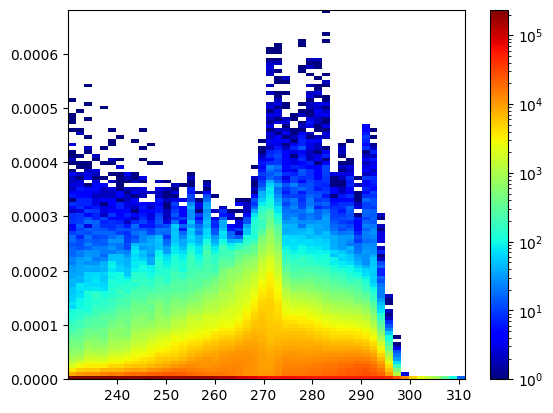

In [609]:
from matplotlib.colors import LogNorm

inds = (T_new > 230) & (qn_new > 0.0e-6)
x = T_new[inds].flatten()
y = qn_new[inds].flatten()
plt.hist2d(x, y, (50, 100), cmap=plt.cm.jet, cmin=1 , norm = LogNorm())
plt.colorbar()


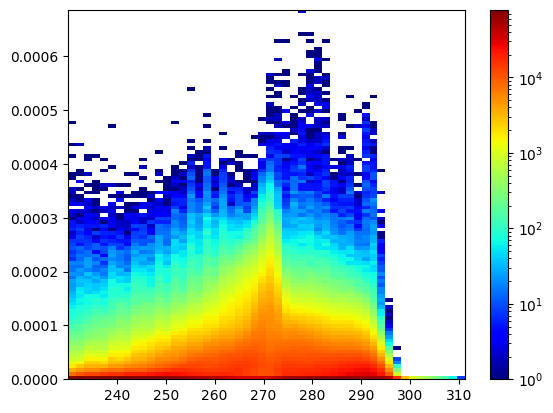

In [610]:
inds = (T_new_pred > 230) & (qn_new_pred > 0.0e-6)
x = T_new_pred[inds].flatten()
y = qn_new_pred[inds].flatten()
plt.hist2d(x, y, (50, 100), cmap=plt.cm.jet, cmin=1 , norm = LogNorm())
plt.colorbar()

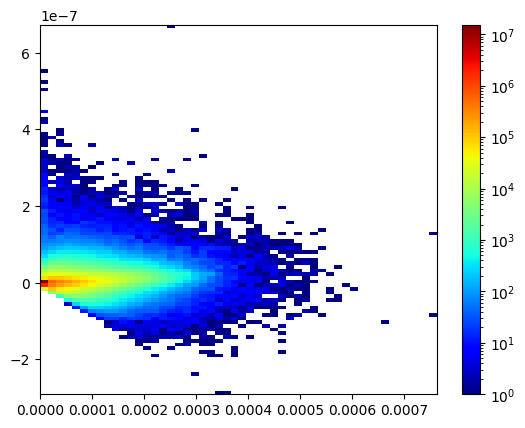

In [611]:
inds = (qn_before > 0.0e-6)
x = qn_before[inds].flatten()
y = dqn[inds].flatten()
plt.hist2d(x, y, (50, 100), cmap=plt.cm.jet, cmin=1 , norm = LogNorm())
left, right = plt.xlim() 
left2, right2 = plt.ylim() 
plt.colorbar()

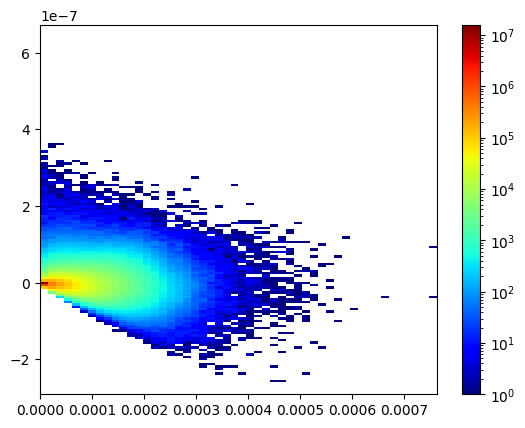

In [612]:
inds = (qn_before > 0.0e-6)
x = qn_before[inds].flatten()
y = dqn_pred[inds].flatten()
plt.hist2d(x, y, (50, 100), cmap=plt.cm.jet, cmin=1 , norm = LogNorm())
plt.xlim(left,right) ; plt.ylim(left2,right2) 
plt.colorbar()

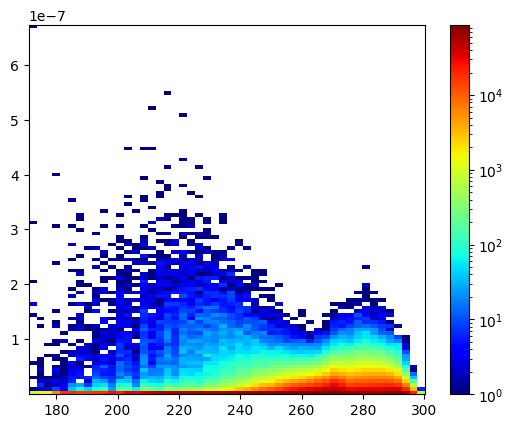

In [613]:
inds = (dqn > 0.0e-6)
x = T_before[inds].flatten()
y = dqn[inds].flatten()
plt.hist2d(x, y, (50, 100), cmap=plt.cm.jet, cmin=1 , norm = LogNorm())
left, right = plt.xlim() 
left2, right2 = plt.ylim() 
plt.colorbar()

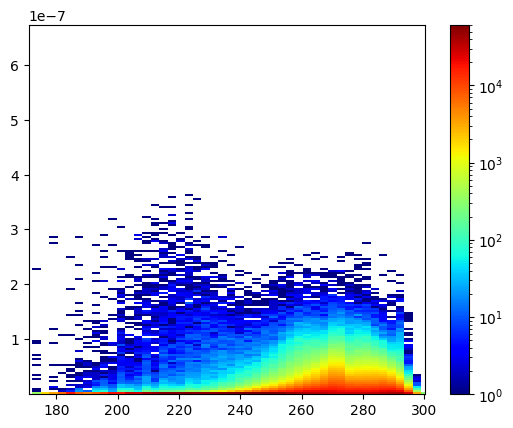

In [614]:
inds = (dqn_pred > 0.0e-6)
x = T_before[inds].flatten()
y = dqn_pred[inds].flatten()
plt.hist2d(x, y, (50, 100), cmap=plt.cm.jet, cmin=1 , norm = LogNorm())
plt.xlim(left,right) ; plt.ylim(left2,right2) 
plt.colorbar()

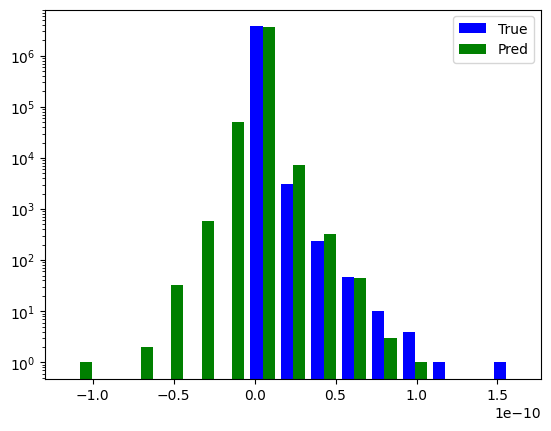

In [634]:
inds = (qn_before > 0.0e-6) & (dqn > 0.0e-6) 
prod_true = qn_before*dqn
prod_pred = qn_before*dqn_pred

colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prod_true[inds].flatten(),prod_pred[inds].flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['True','Pred'])

5.51995e-12 -8.737767e-10
6.7286135e-07 3.6413263e-07
-2.9112232e-07 -2.5907053e-07


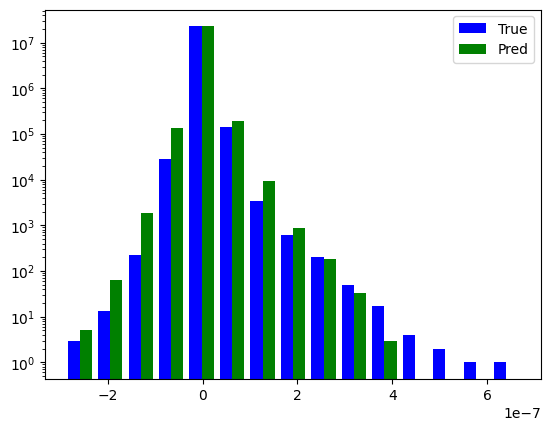

In [635]:
print(dqn.mean(), dqn_pred.mean())
print(dqn.max(), dqn_pred.max())
print(dqn.min(), dqn_pred.min())

colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([dqn.flatten(),dqn_pred.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['True','Pred'])

In [619]:
data_path = '/data/ClimSim/hu_etal2024_data/'
data_path_docker = "/data/climsim-online/scratch/"

grid_path = '../grid_info/ClimSim_low-res_grid-info.nc'
grid_info = xr.open_dataset(grid_path)
level = grid_info.lev.values
nlev = level.shape[0]

hyai_np = grid_info['hyai'].values
hybi_np = grid_info['hybi'].values
hyai_np = np.reshape(hyai_np,(1,nlev+1))
hybi_np = np.reshape(hybi_np,(1,nlev+1))
hyam_np = grid_info['hyam'].values
hybm_np = grid_info['hybm'].values
hyam_np = np.reshape(hyam_np,(1,nlev))
hybm_np = np.reshape(hybm_np,(1,nlev))
sp = x_sfc_np[:,:,0].reshape((-1,1))

prec_true = y_sfc_np[:,:,3].reshape((-1,1))  * 1000.0 # density of water. m s-1 * 1000 kg m-3 = kg m-2 s-1 
prec_pred = outs_sfc[0,:,:,3].reshape((-1,1))  * 1000.0 # density of water. m s-1 * 1000 kg m-3 = kg m-2 s-1 
#sp = sp.reshape((sp.shape[0],sp.shape[1],1))


In [620]:
one_over_grav = 0.1019716213
thick= one_over_grav*(sp * (hybi_np[:,1:61]-hybi_np[:,0:60]) + 100000.0*(hyai_np[:,1:61]-hyai_np[:,0:60]))

print("shape dq pred", dq_pred.shape)
dp_water_pred = thick*(dq_pred + dliq_pred + dice_pred)
lhs_pred = np.sum(dp_water_pred,1)
# rhs = LHF / Lv - precip
rhs_pred = - prec_pred.flatten() # Latent heat flux should not be part of loss, as land model is not directly coupled to CRM

dp_water_true = thick*(dq + dliq + dice)
lhs_true = np.sum(dp_water_true,1)
# rhs = LHF / Lv - precip
rhs_true = - prec_true.flatten() # Latent heat flux should not be part of loss, as land model is not directly coupled to CRM


diff_pred = lhs_pred - rhs_pred
diff_true = lhs_true  - rhs_true 
print("mean rhs pred", rhs_pred.mean(), "lhs", lhs_pred.mean(), "diff mean", diff_pred.mean())
print("mean rhs true", rhs_true.mean(), "lhs", lhs_true.mean(), "diff mean", diff_true.mean())

# mp-1_precstore_sedm-norelu(orprec)_TENDFIX_LSTM144_prevt_liqfrachubase+fix_std1-CONDMLPlfrac
# mean rhs pred -3.0884017e-05 lhs -3.242162645601594e-05 diff mean -1.537605236883465e-06
#mean rhs true -2.914399e-05 lhs -2.915032553951371e-05 diff mean -6.3338320013382575e-09

# mp-1_sedm-norelu(orprec)_NOevapprec_TENDFIX_LSTM144_prevt_liqfrachubase+fix_std1-CONDMLPlfrac
# mean rhs pred -3.0606177e-05 lhs -3.0606173678240854e-05 diff mean -2.1822770844448926e-12
# mean rhs true -2.914399e-05 lhs -2.915032553951371e-05 diff mean -6.3338320013382575e-09

shape dq pred (384000, 60)
mean rhs pred -2.8229246e-05 lhs -2.822925124805166e-05 diff mean -6.5757394951648815e-12
mean rhs true -2.8851646e-05 lhs -2.885013432091588e-05 diff mean 1.5128041476959429e-09


In [621]:
print(dt.std(), dq.std(), dqn.std(), dliq.std(), dice.std())
print(1/dt.std(), 1/dq.std(), 1/dqn.std())

5.2939886e-05 3.0920575e-08 6.4238104e-09 5.2565388e-09 3.2229854e-09
18889.35 32340926.0 155670850.0


In [622]:
rh_before_max = np.mean(rh_before,axis=1)
print(np.corrcoef(rh_before_max, prec_true.flatten()))
print(np.corrcoef(rh_before_max, prec_pred.flatten()))

[[1.         0.31749617]
 [0.31749617 1.        ]]
[[1.         0.31817227]
 [0.31817227 1.        ]]


In [623]:
pres = hyam*100000.0 + sp*hybm
print(pres.max())

102705.39139935563


In [624]:
def eliq(T):
    """
    Function taking temperature (in K) and outputting liquid saturation
    pressure (in hPa) using a polynomial fit
    """
    a_liq = np.array([-0.976195544e-15,-0.952447341e-13,0.640689451e-10,
                              0.206739458e-7,0.302950461e-5,0.264847430e-3,
                              0.142986287e-1,0.443987641,6.11239921]);
    c_liq = -80
    T0 = 273.16
    return 100*np.polyval(a_liq,np.maximum(c_liq,T-T0))

def eice(T):
    """
    Function taking temperature (in K) and outputting ice saturation
    pressure (in hPa) using a polynomial fit
    """
    a_ice = np.array([0.252751365e-14,0.146898966e-11,0.385852041e-9,
                      0.602588177e-7,0.615021634e-5,0.420895665e-3,
                      0.188439774e-1,0.503160820,6.11147274]);
    c_ice = np.array([273.15,185,-100,0.00763685,0.000151069,7.48215e-07])
    T0 = 273.16
    return (T>c_ice[0])*eliq(T)+\
    (T<=c_ice[0])*(T>c_ice[1])*100*np.polyval(a_ice,T-T0)+\
    (T<=c_ice[1])*100*(c_ice[3]+np.maximum(c_ice[2],T-T0)*\
                       (c_ice[4]+np.maximum(c_ice[2],T-T0)*c_ice[5]))

def relative_to_specific_humidity(rh, temp, pressure):
    T0 = 273.16 # Freezing temperature in standard conditions
    T00 = 253.16 # Temperature below which we use e_ice
    omega = (temp - T00) / (T0 - T00)
    omega = np.maximum( 0, np.minimum( 1, omega ))
    esat =  omega * eliq(temp) + (1-omega) * eice(temp)
    Rd = 287 # Specific gas constant for dry air
    Rv = 461 # Specific gas constant for water vapor    
    qvs = (Rd*esat)/(Rv*pressure)
    # state_rh = ds['state_q0001']/qvs
    # rh = q / qvs 
    q = rh*qvs
    return q

    
def specific_to_relative_humidity(q, temp, pressure):
    T0 = 273.16 # Freezing temperature in standard conditions
    T00 = 253.16 # Temperature below which we use e_ice
    omega = (temp - T00) / (T0 - T00)
    omega = np.maximum( 0, np.minimum( 1, omega ))
    esat =  omega * eliq(temp) + (1-omega) * eice(temp)
    Rd = 287 # Specific gas constant for dry air
    Rv = 461 # Specific gas constant for water vapor    
    qvs = (Rd*esat)/(Rv*pressure)
    # state_rh = ds['state_q0001']/qvs
    rh = q / qvs 
    return rh


q_before = relative_to_specific_humidity(rh_before, T_before, pres)
print(q_before.max())

0.02018866762179841


In [625]:
q_new_true = q_before + dq*1200
q_new_pred = q_before + dq_pred*1200
print("min max mean q before", q_before.min(), q_before.max(), q_before.mean())

min max mean q before 1.4348351651696285e-08 0.02018866762179841 0.0023855497692445425


In [626]:
print(1200*dq.min(), 1200*dq_pred.min())
print(1200*dq.max(), 1200*dq_pred.max())
print(1200*dq.mean(), 1200*dq_pred.mean())
# -0.0010177176 -0.00058690057
# 0.0013222352 0.0006093417
#-3.3580582e-06 -3.3549816e-06



-0.0010177176 -0.0006850166
0.0013222352 0.00056368136
-3.3580582e-06 -2.269142e-06


In [627]:
tot_liq_cld_frac = np.zeros(q_new_true.shape,dtype=np.float32)
tot_water = q_new_true + qn_new 
inds_pos = tot_water > 0
tot_liq_cld_frac[inds_pos] = qn_new[inds_pos] / tot_water[inds_pos]

1.0 0.0 0.009989275


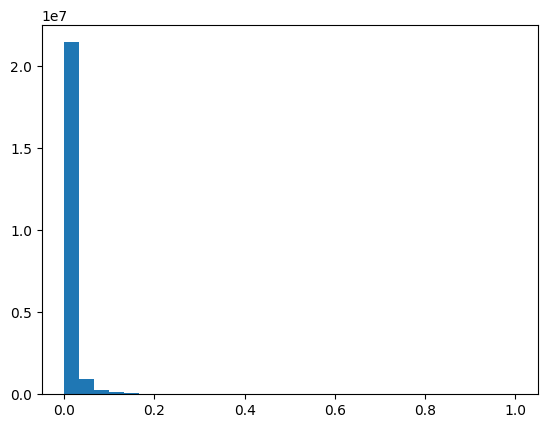

In [628]:
plt.hist(tot_liq_cld_frac.flatten(),bins=30)
print(tot_liq_cld_frac.max(), tot_liq_cld_frac.min(),tot_liq_cld_frac.mean())

1.0 0.0 0.12090553 5.914904
32340926.0 155670850.0 30085062.0


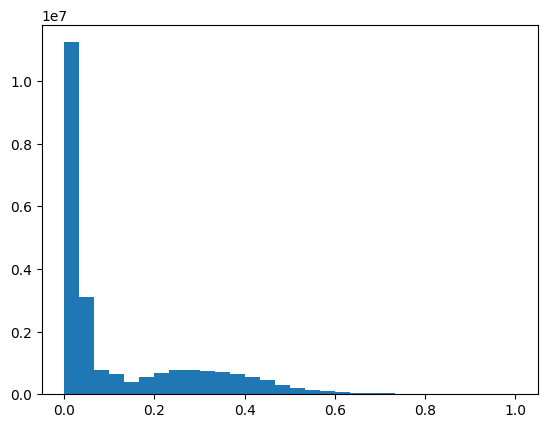

In [446]:
frac = np.sqrt(np.sqrt(tot_liq_cld_frac.flatten()))
plt.hist(frac,bins=30)
print(frac.max(), frac.min(), frac.mean(), 1/frac.std())
print(1/dq.std(), 1/dqn.std(), 1/dqtot.std())

In [629]:
print(q_new_true.min(), q_new_pred.min())
print(q_new_true.max(), q_new_pred.max())
print(q_new_true.mean(), q_new_pred.mean())


3.923884498845554e-13 -2.0827842742051456e-07
0.02020079025074868 0.02019763838553771
0.0023821917113506586 0.002383280631459002


In [630]:
rh_new_true = specific_to_relative_humidity(q_new_true, T_new, pres)
rh_new_pred = specific_to_relative_humidity(q_new_pred, T_new_pred, pres)

In [631]:
print(rh_new_true.min(), rh_new_pred.min())
print(rh_new_true.max(), rh_new_pred.max())
print(rh_new_true.mean(), rh_new_pred.mean())



2.9911259739210916e-08 -0.17867574958983196
60.477993595486154 16.520361297084197
0.5105291342271381 0.5131353607103937


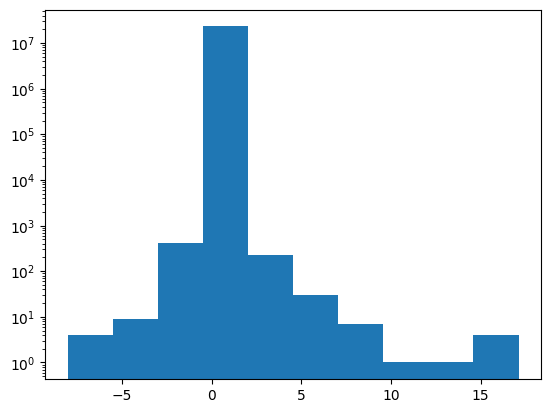

In [38]:
fig, ax1 = plt.subplots()
ax1.hist(rh_new_pred.flatten())
ax1.set_yscale('log')


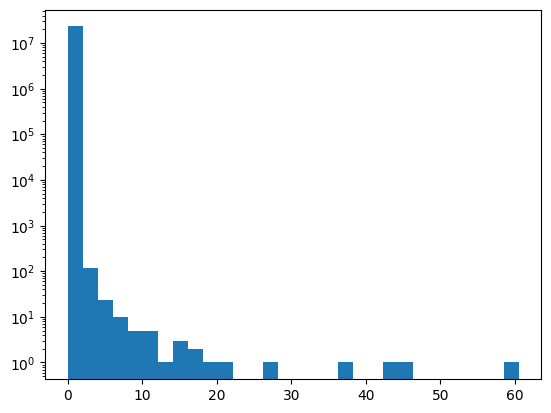

In [39]:
fig, ax1 = plt.subplots()
ax1.hist(rh_new_true.flatten(),bins=30)
ax1.set_yscale('log')

Text(0.5, 0.98, 'Histogram of rh new')

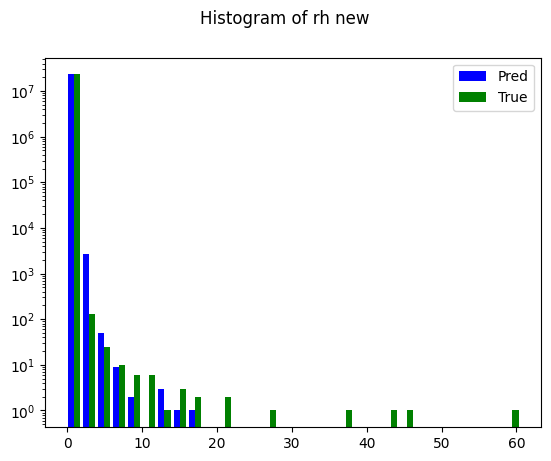

In [632]:

colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([rh_new_pred.flatten(),rh_new_true.flatten()],bins=30,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of rh new")
# 

Text(0.5, 0.98, 'Histogram of rh new')

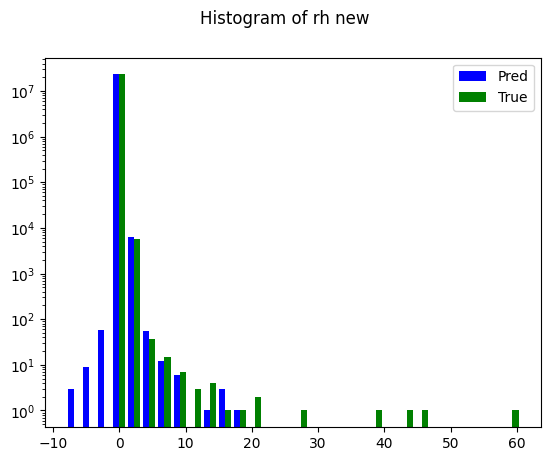

In [40]:

colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([rh_new_pred.flatten(),rh_new_true.flatten()],bins=30,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of rh new")
# after rh loss

Text(0.5, 0.98, 'Histogram of rh new')

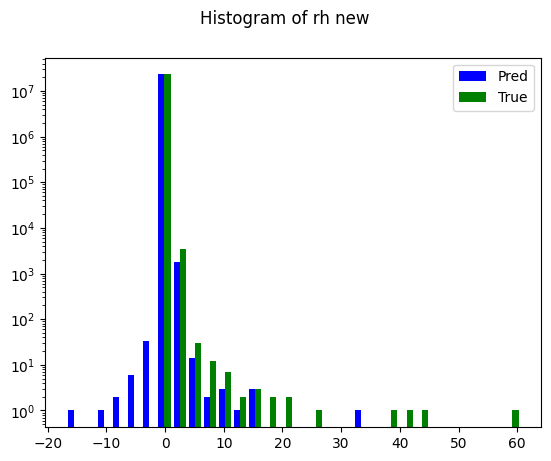

In [315]:

colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([rh_new_pred.flatten(),rh_new_true.flatten()],bins=30,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of rh new")

Text(0.5, 0.98, 'Histogram of q new')

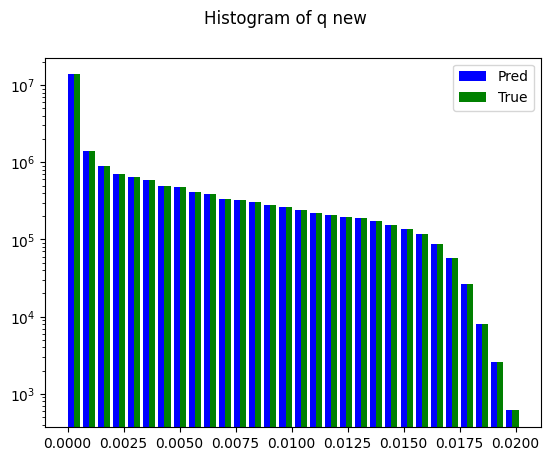

In [272]:

colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([q_new_pred.flatten(),q_new_true.flatten()],bins=30,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of q new")

In [125]:
yscale_lev = np.repeat(np.array([1.87819e+04, 3.25021e+07, 1.58085e+08, 1.0,  5.00182e+04, 6.21923e+04], dtype=np.float32).reshape((1,-1)),nlev,axis=0)
scaleval = 1.0e8
scaleval = 1.58e8
# scaleval = 1.0
scalelev = scaleval*np.ones((nlev),dtype=np.float32)
yscale_lev_new = np.repeat(np.array([1.87819e+04, scaleval, scaleval, 1.0,  5.00182e+04, 6.21923e+04], dtype=np.float32).reshape((1,-1)),nlev,axis=0)

weights = yscale_lev / yscale_lev_new
print(weights[0])

[1.         0.20570949 1.0005379  1.         1.         1.        ]


Text(0.5, 0.98, 'Histogram of lhs-rhs')

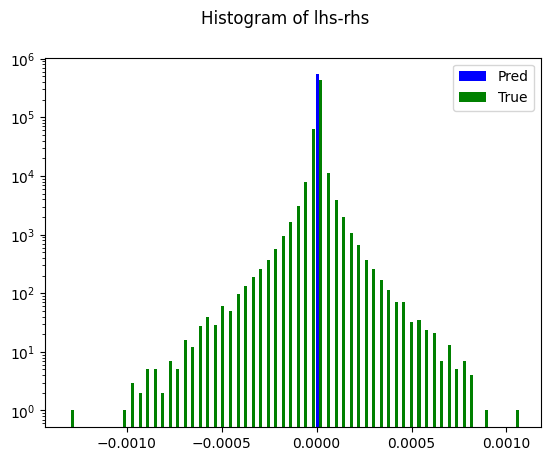

In [115]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([diff_pred.flatten(),diff_true.flatten()],bins=60,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of lhs-rhs")

In [ ]:
dt = np.abs(y_lev_np[:,:,:,0].reshape((-1,60)))
dq = np.abs(y_lev_np[:,:,:,1].reshape((-1,60)))
dliq = np.abs(y_lev_np[:,:,:,2].reshape((-1,60)))
dice = np.abs(y_lev_np[:,:,:,3].reshape((-1,60)))
du = np.abs(y_lev_np[:,:,:,4].reshape((-1,60)))
dv = np.abs(y_lev_np[:,:,:,5].reshape((-1,60)))


(array([3.1003393e+07, 8.8079200e+05, 2.3972200e+05, 8.0050000e+04,
        2.9918000e+04, 1.2363000e+04, 5.4640000e+03, 2.3870000e+03,
        9.9600000e+02, 4.8900000e+02, 2.2200000e+02, 1.0300000e+02,
        5.2000000e+01, 2.5000000e+01, 1.2000000e+01, 5.0000000e+00,
        5.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00]),
 array([0.00000000e+00, 1.15377450e-08, 2.30754900e-08, 3.46132367e-08,
        4.61509799e-08, 5.76887231e-08, 6.92264734e-08, 8.07642166e-08,
        9.23019599e-08, 1.03839703e-07, 1.15377446e-07, 1.26915197e-07,
        1.38452947e-07, 1.49990683e-07, 1.61528433e-07, 1.73066169e-07,
        1.84603920e-07, 1.96141670e-07, 2.07679406e-07, 2.19217156e-07,
        2.30754907e-07]),
 <BarContainer object of 20 artists>)

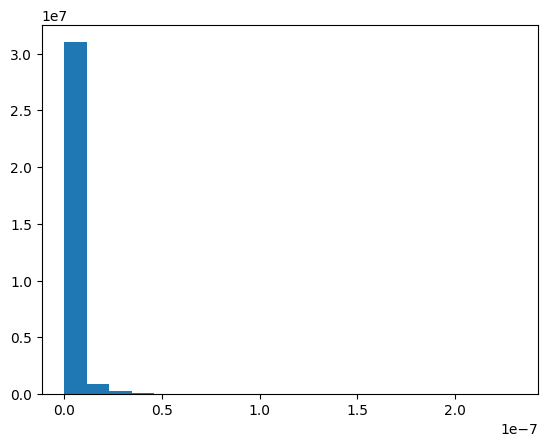

In [147]:
plt.hist(dliq.flatten(),bins=20)

(array([2.3530757e+07, 3.3567950e+06, 2.4337780e+06, 1.4114270e+06,
        7.4062600e+05, 3.9943400e+05, 2.0779900e+05, 9.9059000e+04,
        4.4415000e+04, 1.9067000e+04, 7.8350000e+03, 3.0550000e+03,
        1.2080000e+03, 4.7600000e+02, 1.7800000e+02, 7.0000000e+01,
        1.6000000e+01, 4.0000000e+00, 0.0000000e+00, 1.0000000e+00]),
 array([0.00000000e+00, 2.55397899e-05, 5.10795799e-05, 7.66193698e-05,
        1.02159160e-04, 1.27698950e-04, 1.53238740e-04, 1.78778530e-04,
        2.04318319e-04, 2.29858109e-04, 2.55397899e-04, 2.80937704e-04,
        3.06477479e-04, 3.32017255e-04, 3.57557059e-04, 3.83096864e-04,
        4.08636639e-04, 4.34176414e-04, 4.59716219e-04, 4.85256023e-04,
        5.10795799e-04]),
 <BarContainer object of 20 artists>)

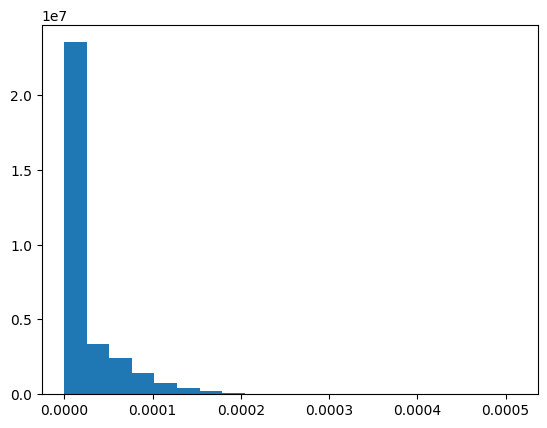

In [196]:
plt.hist(np.sqrt(dliq).flatten(),bins=20)

In [197]:
oneoverstd = []
for vari in range(6):
    var = np.abs(y_lev_np[:,:,:,vari])
    #var = np.sqrt(np.sqrt(np.sqrt(var)))
    #var = np.sqrt(np.sqrt(var))
    var = np.sqrt(var)
    std = 1/np.std(var)
    oneoverstd.append(std)
    var = var*std
    print("var {} 1/std {} max {} std {}".format(vari,std, var.max(), var.std()))

print(np.array(oneoverstd))

var 0 1/std 340.74847412109375 max 13.763059616088867 std 1.0000001192092896
var 1 1/std 11064.900390625 max 10.532572746276855 std 1.0000005960464478
var 2 1/std 27249.48828125 max 13.918924331665039 std 0.9999998211860657
var 3 1/std 43115.125 max 29.716651916503906 std 1.0000004768371582
var 4 1/std 524.7999267578125 max 20.632965087890625 std 1.0000001192092896
var 5 1/std 599.3259887695312 max 19.259735107421875 std 1.0
[  340.74847 11064.9     27249.488   43115.125     524.7999    599.326  ]


In [250]:
xmins = []; xmaxs = []; xmeans = []

for vari in range(x_lev_np.shape[-1]):
    var = x_lev_np[:,:,:,vari]
    xmin = var.min(); xmax = var.max(); xmean=var.mean()
    xmins.append(xmin); xmaxs.append(xmax); xmeans.append(xmean)
    print("var {} min {} max {} mean {}".format(vari, xmin, xmax, xmean))


var 0 min 170.68374633789062 max 314.2897033691406 mean 246.52230834960938
var 1 min 2.909098917314168e-08 max 41.524349212646484 mean 0.5079271197319031
var 2 min 0.0 max 0.000707701314240694 mean 7.315101356653031e-06
var 3 min 0.0 max 0.0007631384069100022 mean 3.729634727278608e-06
var 4 min -152.58168029785156 max 144.83255004882812 mean 7.823933124542236
var 5 min -130.570068359375 max 156.2954559326172 mean 0.040367767214775085
var 6 min -0.0025478380266577005 max 0.003542548045516014 mean 1.8644631154529634e-06
var 7 min -8.498293482261943e-07 max 7.650294264749391e-07 mean 2.8351112568714143e-09
var 8 min -0.04803287237882614 max 0.0445425845682621 mean -6.870039470641132e-08
var 9 min -0.0025478380266577005 max 0.003542548045516014 mean 1.8643551129571279e-06
var 10 min -8.498293482261943e-07 max 7.650294264749391e-07 mean 2.835091050812366e-09
var 11 min -0.04803287237882614 max 0.0445425845682621 mean -6.979621502978262e-08
var 12 min 1.0544778383803077e-08 max 1.7713133274

In [251]:
np.array(xmins)

array([ 1.7068375e+02,  2.9090989e-08,  0.0000000e+00,  0.0000000e+00,
       -1.5258168e+02, -1.3057007e+02, -2.5478380e-03, -8.4982935e-07,
       -4.8032872e-02, -2.5478380e-03, -8.4982935e-07, -4.8032872e-02,
        1.0544778e-08,  1.7876416e-10,  3.6522332e-10, -1.4824549e-03,
       -9.6196311e-07, -1.7394072e-07, -2.9112232e-07, -1.4324093e-03],
      dtype=float32)

In [252]:
np.array(xmaxs)

array([3.1428970e+02, 4.1524349e+01, 7.0770131e-04, 7.6313841e-04,
       1.4483255e+02, 1.5629546e+02, 3.5425480e-03, 7.6502943e-07,
       4.4542585e-02, 3.5425480e-03, 7.6502943e-07, 4.4542585e-02,
       1.7713133e-05, 9.9860586e-07, 4.9085838e-07, 1.6904068e-03,
       1.1315849e-06, 3.1745159e-07, 6.7286135e-07, 4.2665419e-03],
      dtype=float32)

In [253]:
np.array(xmeans)

array([ 2.4652231e+02,  5.0792712e-01,  7.3151014e-06,  3.7296347e-06,
        7.8239331e+00,  4.0367767e-02,  1.8644631e-06,  2.8351113e-09,
       -6.8700395e-08,  1.8643551e-06,  2.8350911e-09, -6.9796215e-08,
        1.9556560e-06,  8.2271487e-07,  3.8844493e-07, -1.7993794e-06,
       -2.8229272e-09,  7.1136300e-12, -9.3221915e-13,  3.6559445e-07],
      dtype=float32)

In [254]:
t = x_lev_np[:,:,:,0].reshape((-1,60))
rh = x_lev_np[:,:,:,1].reshape((-1,60))
rh = np.clip(rh, 0.0, 3.0)
cldliq = x_lev_np[:,:,:,2].reshape((-1,60))
cldice = x_lev_np[:,:,:,3].reshape((-1,60))

In [259]:
lbd_qi_lev = np.array([10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        ,  7556905.1099813 ,
        3240294.53811436,  4409304.29170528,  5388911.78320826,
        1414189.69398583,   444847.03675674,   550036.71076073,
         452219.47765234,   243545.07231263,   163264.17204164,
         128850.88117789,   108392.13699281,    96868.6539061 ,
          90154.39383647,    83498.67423248,    76720.52614694,
          70937.87706283,    66851.27198026,    64579.78345685,
          64987.05874437,    68963.77227883,    75498.91605962,
          82745.37660119,    89624.52634008,    96373.41157796,
         102381.42808207,   102890.33417304,    96849.77123401,
          92727.78368907,    91320.9721545 ,    91240.30382044,
          91448.65004889,    91689.26513737,    91833.1829058 ,
          91941.15859653,    92144.1029509 ,    92628.38565183,
          93511.1538428 ,    94804.20080999,    96349.5878153 ,
          98174.89731264,   100348.81479455,   102750.86508174,
         105013.71207426,   106732.83687405,   107593.00387448,
         108022.91061398,   109634.8552567 ,   112259.85403167], dtype=np.float32)
lbd_qi_mean = np.repeat(np.float32(2291547.5),60)

lbd_qc_lev = np.array([10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        , 10000000.        ,
       10000000.        , 10000000.        ,  2410793.53754872,
        3462644.65436088,  1594172.20270602,   328086.13752288,
         154788.55435228,   118712.37335602,   104208.42410058,
          95801.11739569,    89619.52961093,    83709.51800851,
          78846.75613935,    74622.76219094,    70555.95112947,
          66436.67119096,    61797.61126943,    56926.03823691,
          51838.00818631,    46355.21691466,    40874.23574077,
          36196.39550842,    32935.40953052,    31290.83140741,
          30908.27330462,    31386.06558422,    32606.7350768 ,
          34631.09245739,    37847.88977875,    42878.24049123,
          50560.90175672,    61294.98389768,    72912.41450047,
          80998.32102651,    88376.7321416 ,   135468.13760583], dtype=np.float32)
lbd_qc_mean = np.repeat(np.float32(4496518.0),60)


cldliq_norm = 1 - np.exp(-cldliq*lbd_qc_lev)
cldice_norm = 1 - np.exp(-cldice*lbd_qi_lev)

In [257]:
cldliq_sqrt = np.sqrt(np.sqrt(cldliq))
cldice_sqrt = np.sqrt(np.sqrt(cldice))

print("cldliq min max mean", cldliq.min(), cldliq.max(), cldliq.mean())
print("cldice min max mean", cldice.min(), cldice.max(), cldice.mean())

print("cldliq sqrt min max mean", cldliq_sqrt.min(), cldliq_sqrt.max(), cldliq_sqrt.mean())
print("cldice sqrt min max mean", cldice_sqrt.min(), cldice_sqrt.max(), cldice_sqrt.mean())

cldliq min max mean 0.0 0.0007077013 7.3151014e-06
cldice min max mean 0.0 0.0007631384 3.7296347e-06
cldliq sqrt min max mean 0.0 0.16310321 0.019700546
cldice sqrt min max mean 0.0 0.16620758 0.017105427


In [286]:
cldliq_sqrt_max_lev = np.max(cldliq_sqrt,axis=1)
cldliq_sqrt_min_lev = np.min(cldliq_sqrt,axis=1)
cldice_sqrt_max_lev = np.max(cldice_sqrt,axis=1)

In [288]:
cldliq_sqrt_max_lev[0:60]

array([0.06409745, 0.07279066, 0.08491551, 0.08586378, 0.07479702,
       0.10925891, 0.09236873, 0.10074647, 0.13595091, 0.12460992,
       0.06662043, 0.06102477, 0.05981369, 0.07460018, 0.06182555,
       0.05296352, 0.10104448, 0.07685696, 0.10398461, 0.10538395,
       0.10213365, 0.13026048, 0.09493926, 0.11905684, 0.06934705,
       0.07884553, 0.06425599, 0.08055769, 0.09610786, 0.09114015,
       0.0555291 , 0.07346272, 0.08023088, 0.10057245, 0.08290362,
       0.07026406, 0.04702754, 0.0646119 , 0.04765288, 0.02323583,
       0.03690898, 0.04063744, 0.01694667, 0.02480931, 0.02364327,
       0.05259408, 0.03762454, 0.02973258, 0.0726616 , 0.08761164,
       0.09737073, 0.08528949, 0.09362558, 0.05383503, 0.10398369,
       0.09758132, 0.04268188, 0.05272925, 0.09230035, 0.05247647],
      dtype=float32)

In [276]:
cldice_sqrt_max_lev[0:60]

array([0.02128103, 0.03097945, 0.04133104, 0.03814616, 0.03071741,
       0.04921209, 0.0349906 , 0.0621207 , 0.03902115, 0.02618893,
       0.03360473, 0.03606981, 0.03421638, 0.04245315, 0.06707487,
       0.0456846 , 0.10221355, 0.09135034, 0.12332448, 0.12254874,
       0.04987606, 0.03505399, 0.07895982, 0.03390971, 0.03758059,
       0.07999245, 0.03294151, 0.06352991, 0.11940498, 0.08219492,
       0.06530753, 0.05718852, 0.07720355, 0.07993033, 0.01270323,
       0.02667539, 0.04528168, 0.02840838, 0.03127177, 0.01574609,
       0.03673217, 0.02894438, 0.0193363 , 0.0306002 , 0.03847099,
       0.02968868, 0.04027644, 0.02477795, 0.05888111, 0.03924927,
       0.11470781, 0.06194814, 0.05945031, 0.0422797 , 0.07257237,
       0.08020738, 0.03549062, 0.06650916, 0.07275269, 0.0400284 ],
      dtype=float32)

(array([3.0980095e+07, 8.3200300e+05, 2.6637600e+05, 9.6320000e+04,
        3.9715000e+04, 1.9994000e+04, 1.0328000e+04, 5.0440000e+03,
        2.5910000e+03, 1.3650000e+03, 7.7300000e+02, 4.5700000e+02,
        3.6000000e+02, 2.2300000e+02, 1.3000000e+02, 8.8000000e+01,
        5.6000000e+01, 2.0000000e+01, 1.8000000e+01, 1.5000000e+01,
        7.0000000e+00, 1.5000000e+01, 5.0000000e+00, 1.0000000e+00,
        1.0000000e+00]),
 array([0.00000000e+00, 2.75549191e-05, 5.51098383e-05, 8.26647592e-05,
        1.10219677e-04, 1.37774594e-04, 1.65329518e-04, 1.92884429e-04,
        2.20439353e-04, 2.47994263e-04, 2.75549188e-04, 3.03104112e-04,
        3.30659037e-04, 3.58213962e-04, 3.85768857e-04, 4.13323782e-04,
        4.40878706e-04, 4.68433631e-04, 4.95988526e-04, 5.23543451e-04,
        5.51098376e-04, 5.78653300e-04, 6.06208225e-04, 6.33763149e-04,
        6.61318074e-04, 6.88872999e-04]),
 <BarContainer object of 25 artists>)

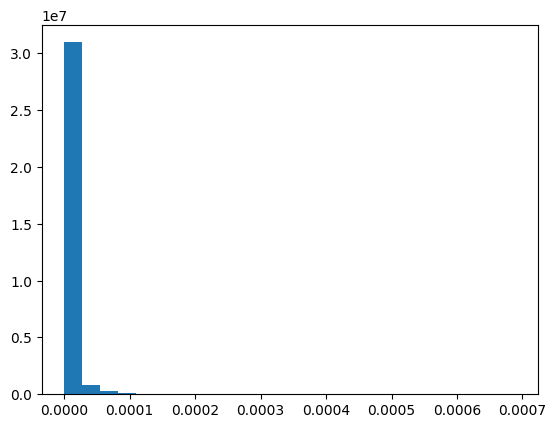

In [228]:
plt.hist(cldice.flatten(),bins=25)

In [289]:
norm_path = '../preprocessing/normalizations/'

input_mean = xr.open_dataset(norm_path + 'inputs/input_mean_v4_pervar.nc').astype(np.float32)
input_max = xr.open_dataset(norm_path + 'inputs/input_max_v4_pervar.nc').astype(np.float32)
input_min = xr.open_dataset(norm_path + 'inputs/input_min_v4_pervar.nc').astype(np.float32)

vars_2D_inp = ['state_t', 'state_rh', 'state_q0002', 'state_q0003', 'state_u',
      'state_v', 'state_t_dyn', 'state_q0_dyn', 'state_u_dyn', 'tm_state_t_dyn',
      'tm_state_q0_dyn', 'tm_state_u_dyn', 'pbuf_ozone', 'pbuf_CH4', 'pbuf_N2O']
               
xmax_lev = input_max[vars_2D_inp].to_dataarray(dim='features', name='inputs_lev').transpose().values
xmin_lev = input_min[vars_2D_inp].to_dataarray(dim='features', name='inputs_lev').transpose().values
xmean_lev = input_mean[vars_2D_inp].to_dataarray(dim='features', name='inputs_lev').transpose().values

print(xmax_lev.shape)

(60, 15)


(array([1.00569122e+08, 1.37763690e+07, 1.26012140e+07, 1.02976530e+07,
        8.83101700e+06, 7.65182400e+06, 6.45851500e+06, 5.31581000e+06,
        4.44990300e+06, 3.86516300e+06, 3.34385800e+06, 2.62982400e+06,
        1.84623300e+06, 1.20142800e+06, 7.45933000e+05, 3.80062000e+05,
        2.02540000e+05, 1.01901000e+05, 3.61270000e+04, 1.07730000e+04,
        3.35800000e+03, 1.01600000e+03, 2.94000000e+02, 5.80000000e+01,
        5.00000000e+00]),
 array([0.        , 0.0066483 , 0.01329661, 0.01994491, 0.02659321,
        0.03324152, 0.03988982, 0.04653813, 0.05318643, 0.05983473,
        0.06648304, 0.07313134, 0.07977964, 0.08642794, 0.09307625,
        0.09972455, 0.10637286, 0.11302116, 0.11966946, 0.12631777,
        0.13296607, 0.13961437, 0.14626268, 0.15291098, 0.15955928,
        0.16620758]),
 <BarContainer object of 25 artists>)

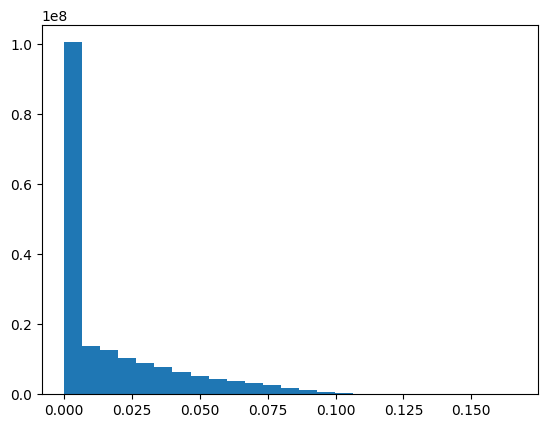

In [258]:
plt.hist(np.sqrt(np.sqrt(cldice)).flatten(),bins=25)

(array([1.36198747e+08, 7.06544100e+06, 4.37030900e+06, 3.23929600e+06,
        2.60004000e+06, 2.18618300e+06, 1.88509200e+06, 1.65751600e+06,
        1.48877000e+06, 1.35401200e+06, 1.25067200e+06, 1.16670200e+06,
        1.10308700e+06, 1.05426700e+06, 1.01980800e+06, 1.00033800e+06,
        9.95928000e+05, 1.00808200e+06, 1.03596600e+06, 1.08965100e+06,
        1.17742500e+06, 1.31855800e+06, 1.54274800e+06, 1.98531700e+06,
        5.52604500e+06]),
 array([0.        , 0.04      , 0.08      , 0.12      , 0.16      ,
        0.19999999, 0.23999999, 0.28      , 0.31999999, 0.35999998,
        0.39999998, 0.44      , 0.47999999, 0.51999998, 0.56      ,
        0.59999996, 0.63999999, 0.68000001, 0.71999997, 0.75999999,
        0.79999995, 0.83999997, 0.88      , 0.91999996, 0.95999998,
        1.        ]),
 <BarContainer object of 25 artists>)

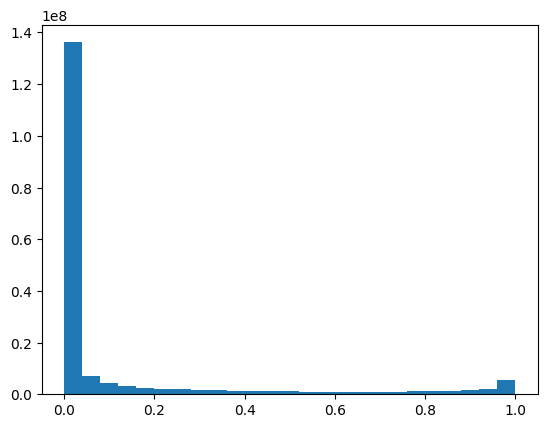

In [260]:
plt.hist(cldice_norm.flatten(),bins=25)

In [16]:
print(y_true.shape, y_pred.shape)

(1400, 384, 60, 6) (1400, 384, 60, 6)


In [24]:
print(outs_lev[0].mean(), outs_lev[1].mean())

-2.6458306e-07 -2.6459068e-07


In [39]:
import torch.nn.functional as F

qliq_before     = x_lev_np[:,:,:,2]
qice_before     = x_lev_np[:,:,:,3]   
qn_before       = qliq_before + qice_before 

dqliq = y_lev_np[:,:,:,2]
dqice = y_lev_np[:,:,:,3]  
dqn =  dqliq + dqice

qn_new          = qn_before + dqn*1200  
qliq_new        = qliq_before + dqliq*1200
# qice_new        = qice_before + dqice*1200

inds = np.nonzero(qn_new)
liq_frac = np.zeros_like(qn_new)
liq_frac[inds] = qliq_new[inds] / qn_new[inds]

liq_frac[liq_frac<0.0] = 0.0
liq_frac[liq_frac>1.0] = 1.0


            

In [49]:
temp = xlev[:,:,:,0]
temp = temp +  ylev[:,:,:,0]*1200
temp.mean()
liq_frac_hu = (temp - 253.16) * 0.05 
liq_frac_hu = F.hardtanh(liq_frac_hu, 0.0, 1.0)
liq_frac_hu = liq_frac_hu.numpy()

In [46]:
ylev.shape

torch.Size([1400, 384, 60, 6])

In [ ]:
plt.hist(liq_frac.flatten(),bins=20)

(array([3.8804900e+06, 2.4522200e+05, 2.5742100e+05, 2.7722300e+05,
        3.3416200e+05, 3.9258500e+05, 4.2318400e+05, 4.1383300e+05,
        4.1073800e+05, 2.6349900e+06, 2.2836186e+07, 1.3090000e+04,
        8.5490000e+03, 4.1690000e+03, 2.9930000e+03, 2.8340000e+03,
        1.4660000e+03, 1.2070000e+03, 1.0590000e+03, 1.1459900e+05]),
 array([-1.        , -0.89999998, -0.80000001, -0.69999999, -0.60000002,
        -0.5       , -0.39999998, -0.30000001, -0.19999999, -0.09999996,
         0.        ,  0.10000002,  0.20000005,  0.30000007,  0.39999998,
         0.5       ,  0.60000002,  0.70000005,  0.80000007,  0.89999998,
         1.        ]),
 <BarContainer object of 20 artists>)

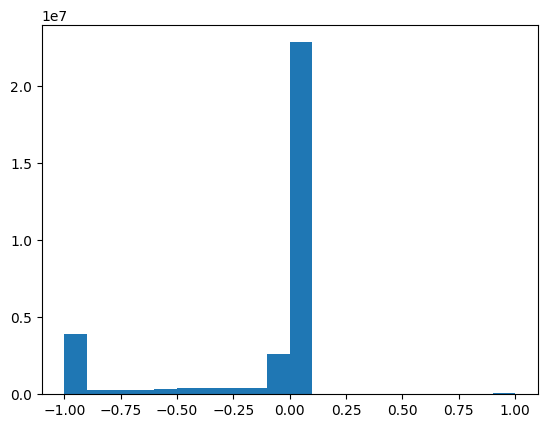

In [52]:
plt.hist(liq_frac.flatten()-liq_frac_hu.flatten(),bins=20)

In [54]:
diff = liq_frac - liq_frac_hu 
print(diff.min(), diff.max(), diff.mean())

-1.0 1.0 -0.15585405


In [56]:
np.corrcoef(liq_frac.flatten(), liq_frac_hu.flatten())

array([[1.       , 0.6374986],
       [0.6374986, 1.       ]])

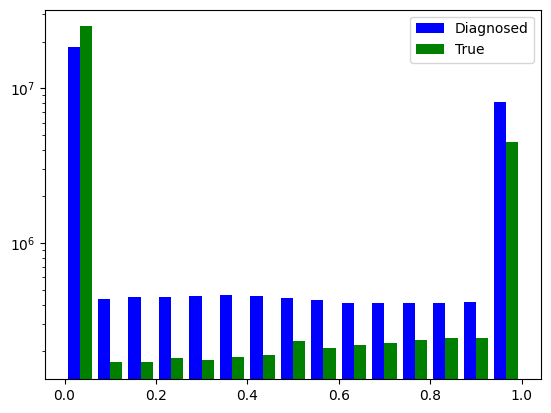

In [55]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([liq_frac_hu.flatten(),liq_frac.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Diagnosed','True'])

In [37]:
for j in range(0,60):
    print(liquid_ratio_true[0,0,j],liquid_ratio[0,0,j]) 

tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.2984)
tensor(0.) tensor(0.5489)
tensor(0.) tensor(0.4095)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(3.5133e-27) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-9.8540e-35) tensor(0.)
tensor(5.8069e-30) tensor(0.)
tensor(6.7432e-26) tensor(0.)
tensor(2.0275e-22) tensor(0.)
tensor(4.7439e-18) tensor(0.)
tensor(3.0922e-16) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.0002) tensor(0.)
tensor(0.0065) tensor(0.)
tensor(0.0183) tensor(0.)
tensor(0.1218) tensor(0.1586)
tensor(0.2872) tensor(0.3193)
tensor(0.4316) tensor(0.4700)
tensor(0.4081) tensor(0.6162)
tensor(0.5804) tensor(0.7478)
tensor(0.7267

In [13]:
cltot_pred = outs_lev[:,:,:,:,2] + outs_lev[:,:,:,:,3]
cltot_lev_std = np.std(cltot_pred,axis=0)
r2_cltot_wv_z = np.corrcoef(cltot_lev_std.flatten(), outs_lev_std[:,:,:,1].flatten())[0,1]
print("Correlation between water vapor stochasticity and cloud water stochasticity: {} ".format(r2_cltot_wv_z))


NameError: name 'outs_lev' is not defined

In [16]:
print("Correlation between water vapor tendency and precipitation")
wv_tend_int_true = np.sum(y_true[:,:,:,1],axis=2)
wv_tend_int_pred = np.sum(y_pred[:,:,:,1],axis=2)
print(wv_tend_int_true.shape)
print(prec_true.shape)

r2_true = np.corrcoef(wv_tend_int_true.flatten(), prec_true.flatten())[0,1]
r2_pred = np.corrcoef(wv_tend_int_pred.flatten(), prec_pred.flatten())[0,1]
print("True: {}, pred: {}".format(r2_true, r2_pred))


Correlation between water vapor tendency and precipitation
(1400, 384)
(1400, 384)
True: -0.8342216693521806, pred: -0.8284687605449937


In [79]:
temp = x_lev_np[:,:,:,0]
sp = x_sfc_np[:,:,0]

print(sp.shape, sp.min(), sp.max())
print(temp.shape, temp.min(), temp.max())

data_path = '/data/ClimSim/hu_etal2024_data/'
data_path_docker = "/data/climsim-online/scratch/"

grid_path = '../grid_info/ClimSim_low-res_grid-info.nc'
grid_info = xr.open_dataset(grid_path)
level = grid_info.lev.values
nlev = level.shape[0]

hyam = grid_info['hyam'].values
hybm = grid_info['hybm'].values
hyam = np.reshape(hyam,(1,1,nlev))
hybm = np.reshape(hybm,(1,1,nlev))

sp = sp.reshape((sp.shape[0],sp.shape[1],1))

pres =   hyam*100000.0 + sp*hybm
print(pres.min(), pres.max())

(1400, 384) 73336.26 103766.87
(1400, 384, 60) 171.93896 310.36487
7.834781133863082 102996.49578079407


In [97]:
print(temp.min(), temp.max())
pres_ref = 100000.0
exponent = 0.286
theta = temp*(pres_ref/pres)**exponent
print(theta.shape)
print(theta.min(), theta.max())
print(theta[:,:,10:].min(), theta[:,:,10:].max())

171.93896 310.36487
(1400, 384, 60)
241.5778044588775 3714.1193642504445
241.5778044588775 860.6083391143778


In [91]:
level

array([7.83478113e-02, 1.41108318e-01, 2.52923297e-01, 4.49250635e-01,
       7.86346161e-01, 1.34735576e+00, 2.24477729e+00, 3.61643148e+00,
       5.61583643e+00, 8.40325322e+00, 1.21444894e+01, 1.70168280e+01,
       2.32107981e+01, 3.09143463e+01, 4.02775807e+01, 5.13746323e+01,
       6.41892284e+01, 7.86396576e+01, 9.46300920e+01, 1.12091274e+02,
       1.30977804e+02, 1.51221318e+02, 1.72673905e+02, 1.95087710e+02,
       2.18155935e+02, 2.41600379e+02, 2.65258515e+02, 2.89122322e+02,
       3.13312087e+02, 3.38006999e+02, 3.63373492e+02, 3.89523338e+02,
       4.16507922e+02, 4.44331412e+02, 4.72957206e+02, 5.02291917e+02,
       5.32152273e+02, 5.62239392e+02, 5.92149276e+02, 6.21432841e+02,
       6.49689897e+02, 6.76656485e+02, 7.02242188e+02, 7.26498589e+02,
       7.49537645e+02, 7.71445217e+02, 7.92234260e+02, 8.11856675e+02,
       8.30259643e+02, 8.47450653e+02, 8.63535902e+02, 8.78715875e+02,
       8.93246018e+02, 9.07385213e+02, 9.21354397e+02, 9.35316717e+02,
      

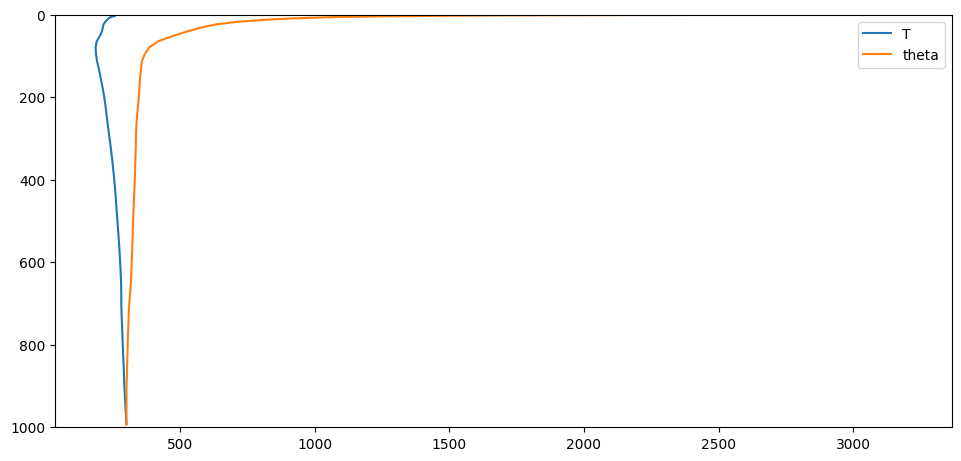

In [88]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(9.5, 4.5),
                        layout="constrained")
axs.plot(temp[0,100,:],level)
axs.plot(theta[0,100,:],level)
axs.legend(['T','theta'])
axs.set_ylim(0,1000)
axs.invert_yaxis()


In [96]:
print(100*level)
print(pres[0,100])
print(temp[0,100,:])
print(theta[0,100,:])

[7.83478113e+00 1.41108318e+01 2.52923297e+01 4.49250635e+01
 7.86346161e+01 1.34735576e+02 2.24477729e+02 3.61643148e+02
 5.61583643e+02 8.40325322e+02 1.21444894e+03 1.70168280e+03
 2.32107981e+03 3.09143463e+03 4.02775807e+03 5.13746323e+03
 6.41892284e+03 7.86396576e+03 9.46300920e+03 1.12091274e+04
 1.30977804e+04 1.51221318e+04 1.72673905e+04 1.95087710e+04
 2.18155935e+04 2.41600379e+04 2.65258515e+04 2.89122322e+04
 3.13312087e+04 3.38006999e+04 3.63373492e+04 3.89523338e+04
 4.16507922e+04 4.44331412e+04 4.72957206e+04 5.02291917e+04
 5.32152273e+04 5.62239392e+04 5.92149276e+04 6.21432841e+04
 6.49689897e+04 6.76656485e+04 7.02242188e+04 7.26498589e+04
 7.49537645e+04 7.71445217e+04 7.92234260e+04 8.11856675e+04
 8.30259643e+04 8.47450653e+04 8.63535902e+04 8.78715875e+04
 8.93246018e+04 9.07385213e+04 9.21354397e+04 9.35316717e+04
 9.49378056e+04 9.63599599e+04 9.78013432e+04 9.92635544e+04]
[7.83478113e+00 1.41108318e+01 2.52923297e+01 4.49250635e+01
 7.86346161e+01 1.34735

Text(0.5, 0.98, 'Histogram of precipitation')

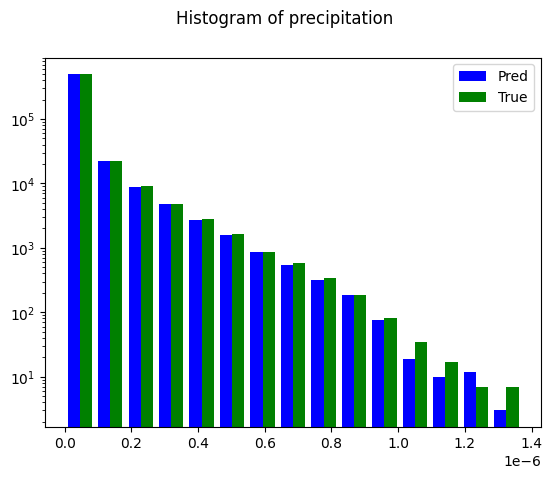

In [118]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation")
# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  95044


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

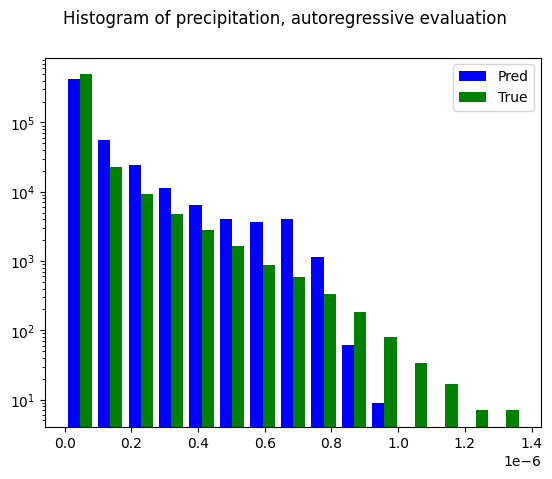

In [131]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  95044


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

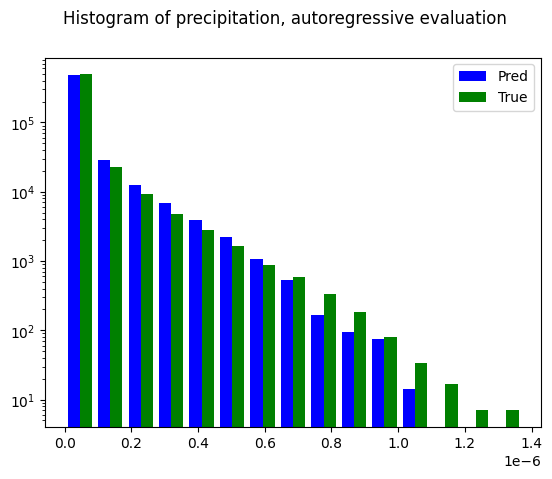

In [159]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# ens3_prevprec_srules-CRPS-sumvar_partiallystochastic_SLSTM4-144-96_..123344..10_hcon2e-3_TSTEPwcon5e9  49489


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

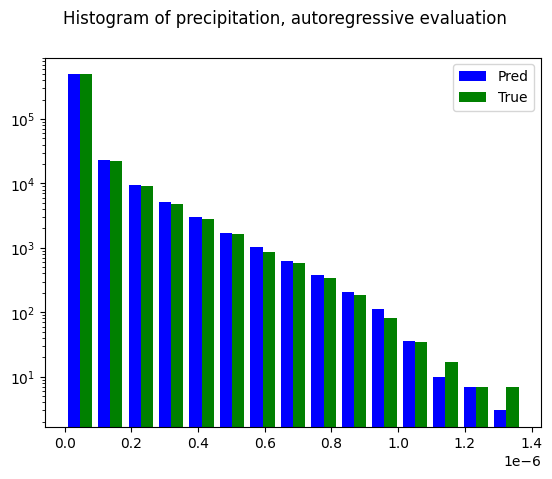

In [17]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# LSTM144-144_mp0_2xwcon-xtime,hcon_1233..12,tr=mixed,val=fullreplay


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

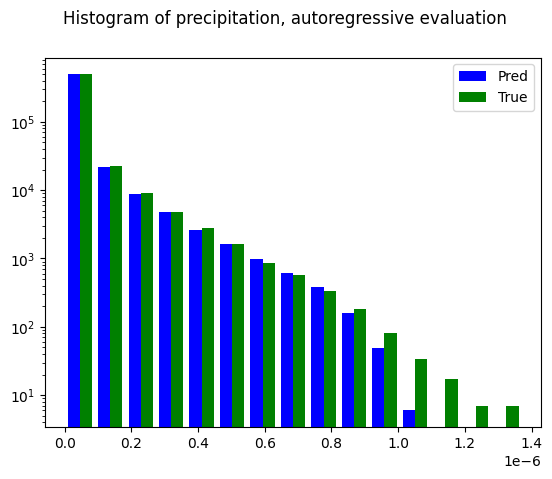

In [17]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# tr=Mixed,ens2_srules-es


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

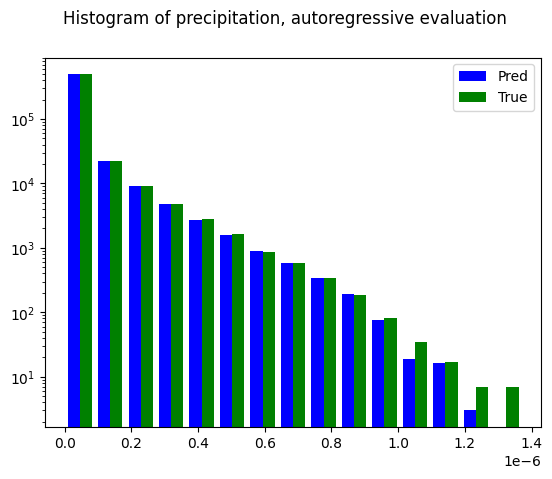

In [31]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# tr=Mixed,ens3_srules-es_partstochastic_SLSTM4-160-96_..122..5_hcon1e-3_wcon5e10(tstep=1)  precmse6e16


Text(0.5, 0.98, 'Histogram of cloud liquid tendencies, autoreg')

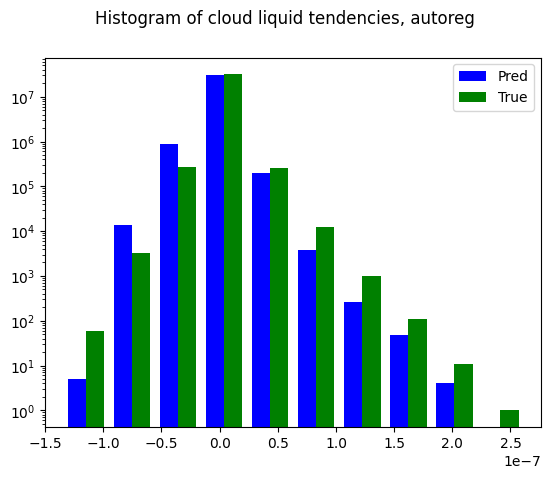

In [160]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([y_pred[:,:,:,2].flatten(),y_true[:,:,:,2].flatten()],color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of cloud liquid tendencies, autoreg")


Text(0.5, 0.98, 'Histogram of cloud liquid tendencies, autoreg')

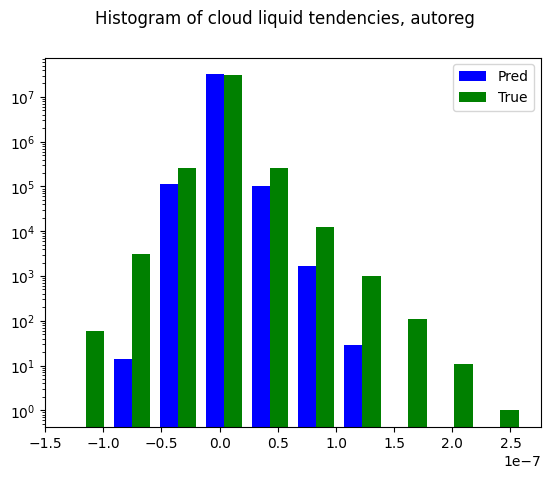

In [18]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([y_pred[:,:,:,2].flatten(),y_true[:,:,:,2].flatten()],color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of cloud liquid tendencies, autoreg")
# # LSTM144-144_mp0_2xwcon-xtime,hcon_1233..12,tr=mixed,val=fullreplay


Text(0.5, 0.98, 'Histogram of cloud liquid tendencies, noprevtend')

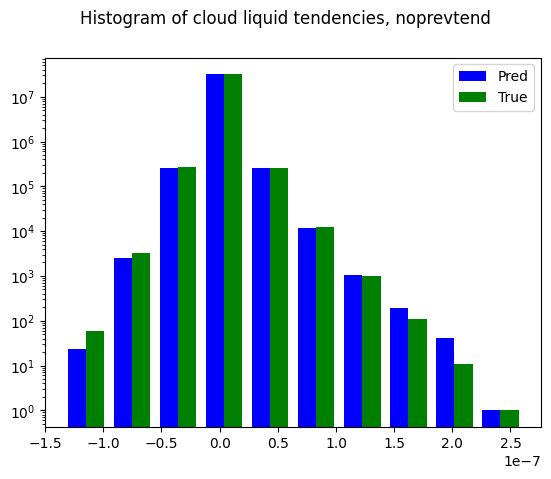

In [44]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([y_pred[:,:,:,2].flatten(),y_true[:,:,:,2].flatten()],color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of cloud liquid tendencies, noprevtend")


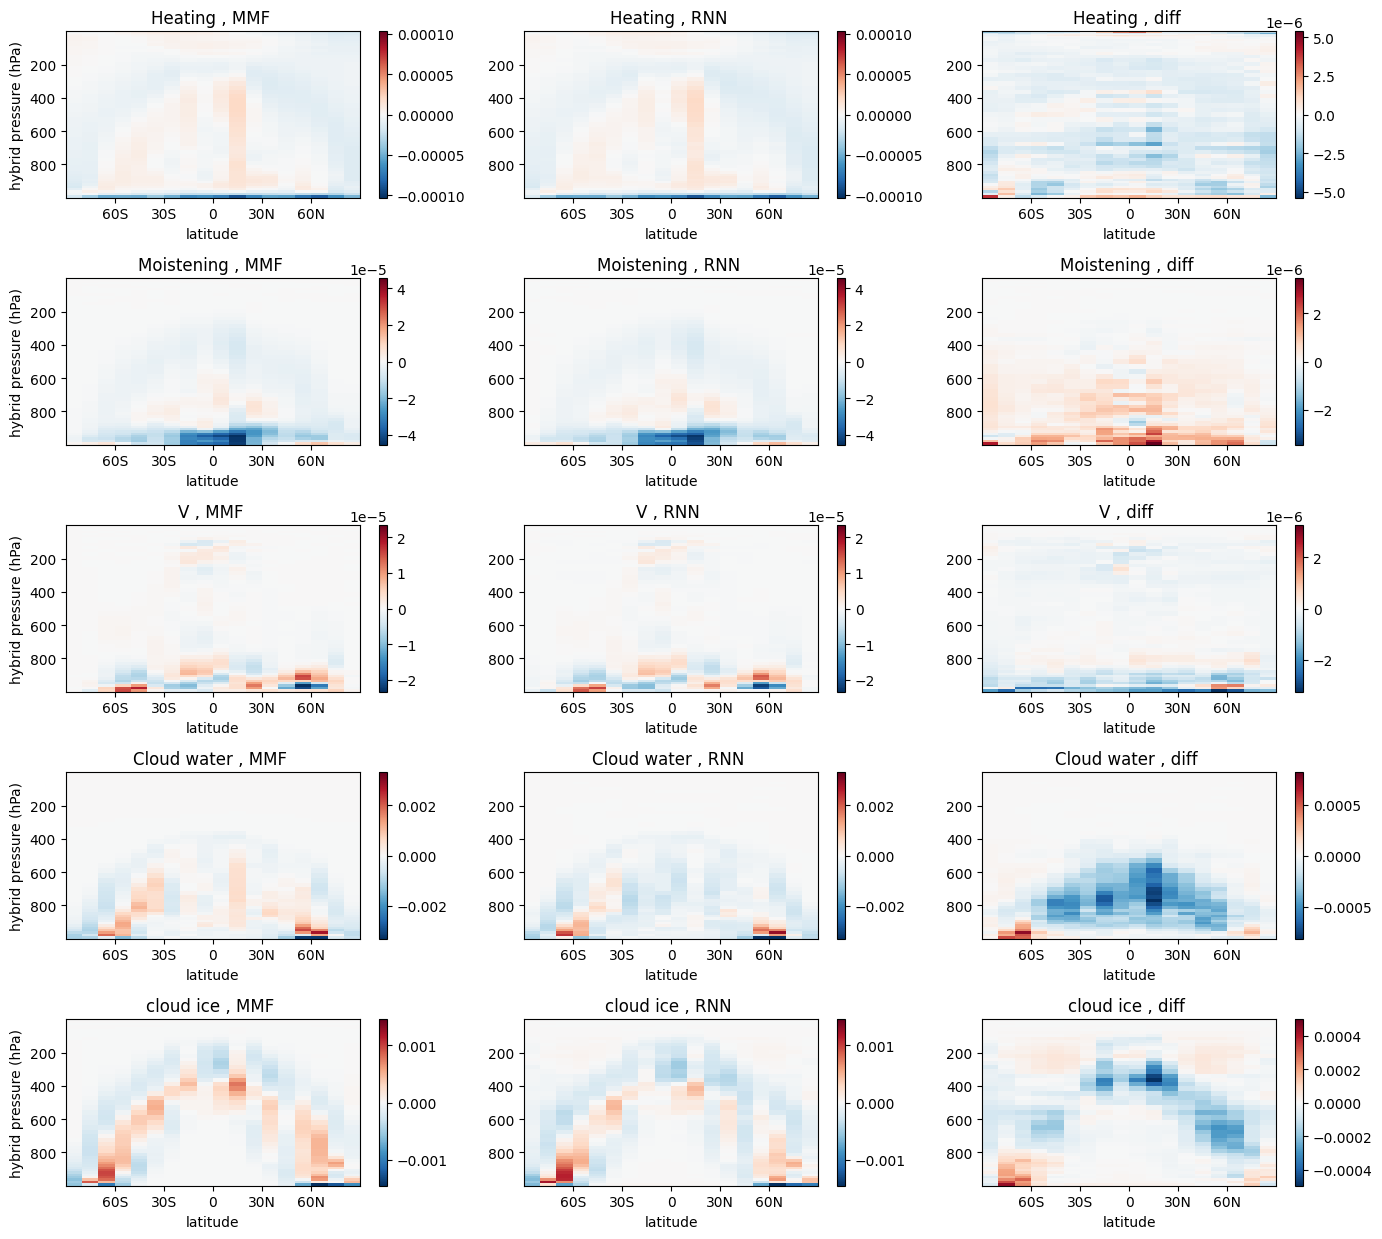

In [22]:
dt_t_mean = y_true[:,:,:,0].mean(axis=0)
dt_p_mean = y_pred[:,:,:,0].mean(axis=0)
q_t_mean = y_true[:,:,:,1].mean(axis=0)
q_p_mean = y_pred[:,:,:,1].mean(axis=0)
clw_t_mean = y_true[:,:,:,2].mean(axis=0)
clw_p_mean = y_pred[:,:,:,2].mean(axis=0)
cli_t_mean = y_true[:,:,:,3].mean(axis=0)
cli_p_mean = y_pred[:,:,:,3].mean(axis=0)
cltot_p_mean = (y_pred[:,:,:,2]+y_pred[:,:,:,3]).mean(axis=0)
u_t_mean = y_true[:,:,:,4].mean(axis=0)
u_p_mean = y_pred[:,:,:,4].mean(axis=0)
v_t_mean = y_true[:,:,:,5].mean(axis=0)
v_p_mean = y_pred[:,:,:,5].mean(axis=0)
gc.collect()


vars_stacked = [[dt_t_mean,dt_p_mean], 
                [q_t_mean,q_p_mean],
                # [u_t_mean,u_p_mean], 
                [v_t_mean,v_p_mean],
                [clw_t_mean,clw_p_mean],
                [cli_t_mean,cli_p_mean]]


ds_grid = xr.open_dataset(data_path+'data_grid/ne4pg2_scrip.nc')
grid_area = ds_grid['grid_area']

ds2 = xr.open_dataset(data_path+'data_grid/E3SM_ML.GNUGPU.F2010-MMF1.ne4pg2_ne4pg2.eam.h0.0001-01.nc')
lat = ds2.lat
lon = ds2.lon
level = ds2.lev.values



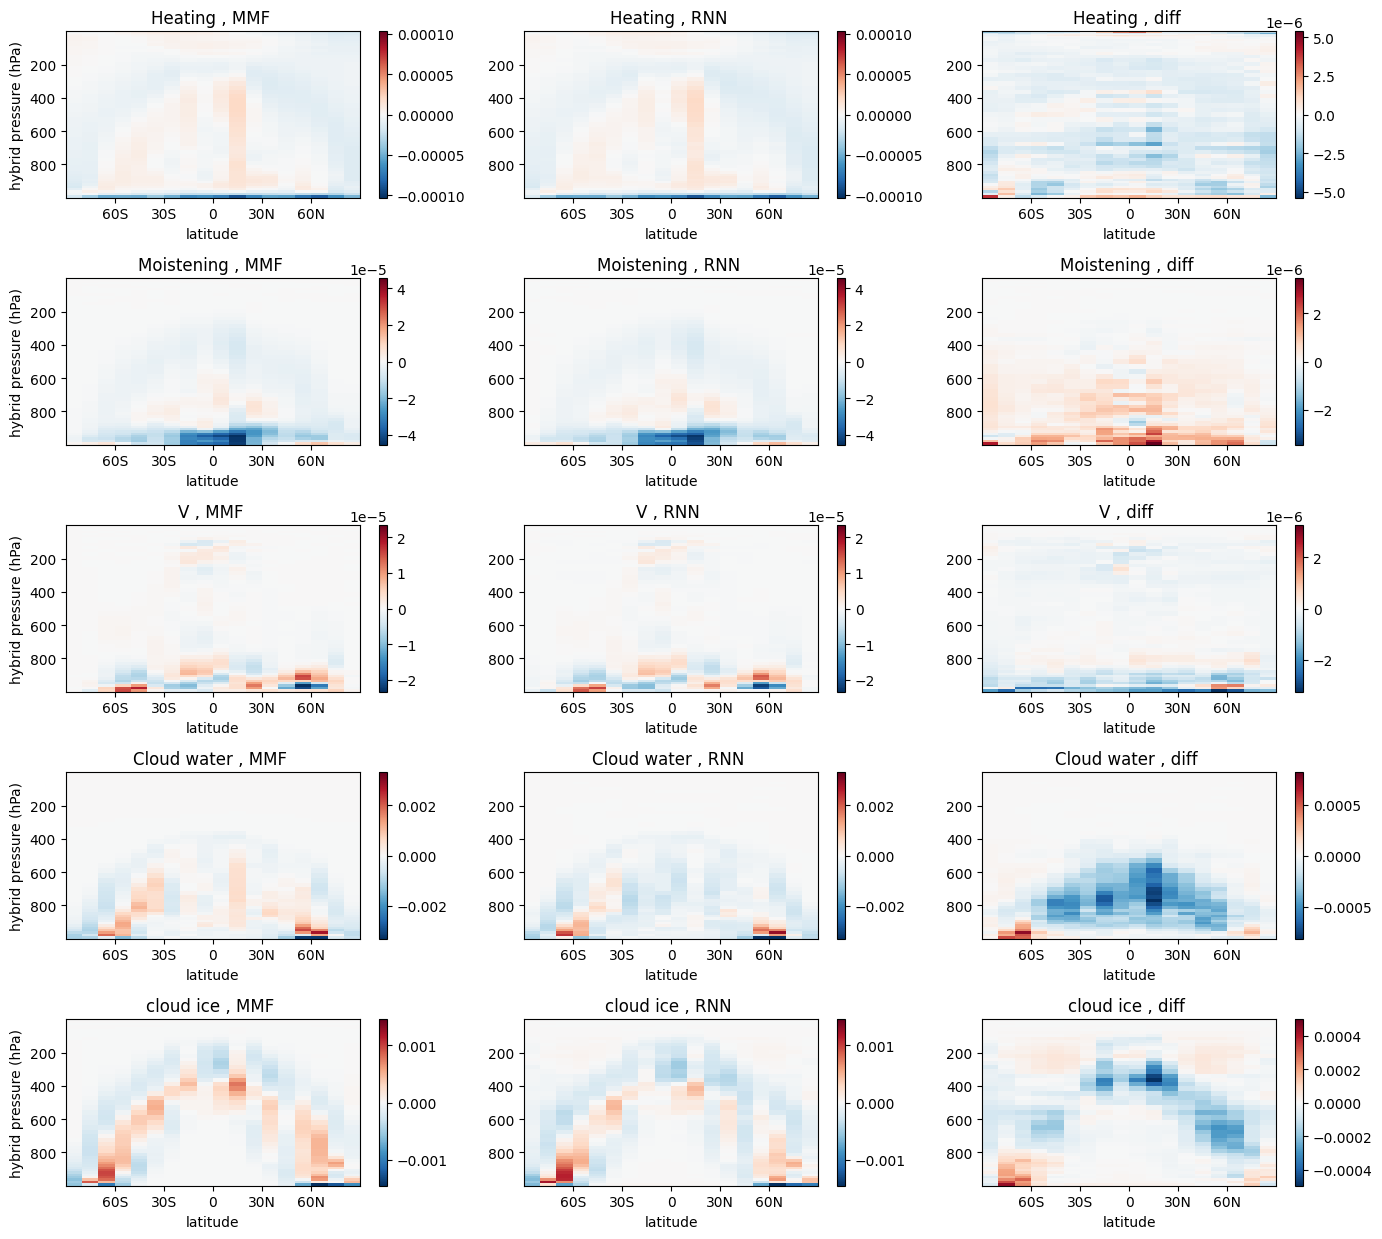

In [28]:
dt_t_mean = y_true[:,:,:,0].mean(axis=0) # (384, 60)
dt_p_mean = y_pred[:,:,:,0].mean(axis=0)
q_t_mean = y_true[:,:,:,1].mean(axis=0)
q_p_mean = y_pred[:,:,:,1].mean(axis=0)
clw_t_mean = y_true[:,:,:,2].mean(axis=0)
clw_p_mean = y_pred[:,:,:,2].mean(axis=0)
cli_t_mean = y_true[:,:,:,3].mean(axis=0)
cli_p_mean = y_pred[:,:,:,3].mean(axis=0)
cltot_p_mean = (y_pred[:,:,:,2]+y_pred[:,:,:,3]).mean(axis=0)
u_t_mean = y_true[:,:,:,4].mean(axis=0)
u_p_mean = y_pred[:,:,:,4].mean(axis=0)
v_t_mean = y_true[:,:,:,5].mean(axis=0)
v_p_mean = y_pred[:,:,:,5].mean(axis=0)
gc.collect()


vars_stacked = [[dt_t_mean,dt_p_mean], 
                [q_t_mean,q_p_mean],
                # [u_t_mean,u_p_mean], 
                [v_t_mean,v_p_mean],
                [clw_t_mean,clw_p_mean],
                [cli_t_mean,cli_p_mean]]

grid_path = '../grid_info/ClimSim_low-res_grid-info.nc'
grid_info = xr.open_dataset(grid_path)
level = grid_info.lev.values
lat = grid_info.lat
grid_area =  grid_info.area

plot_bias(vars_stacked, grid_area, lat, level)

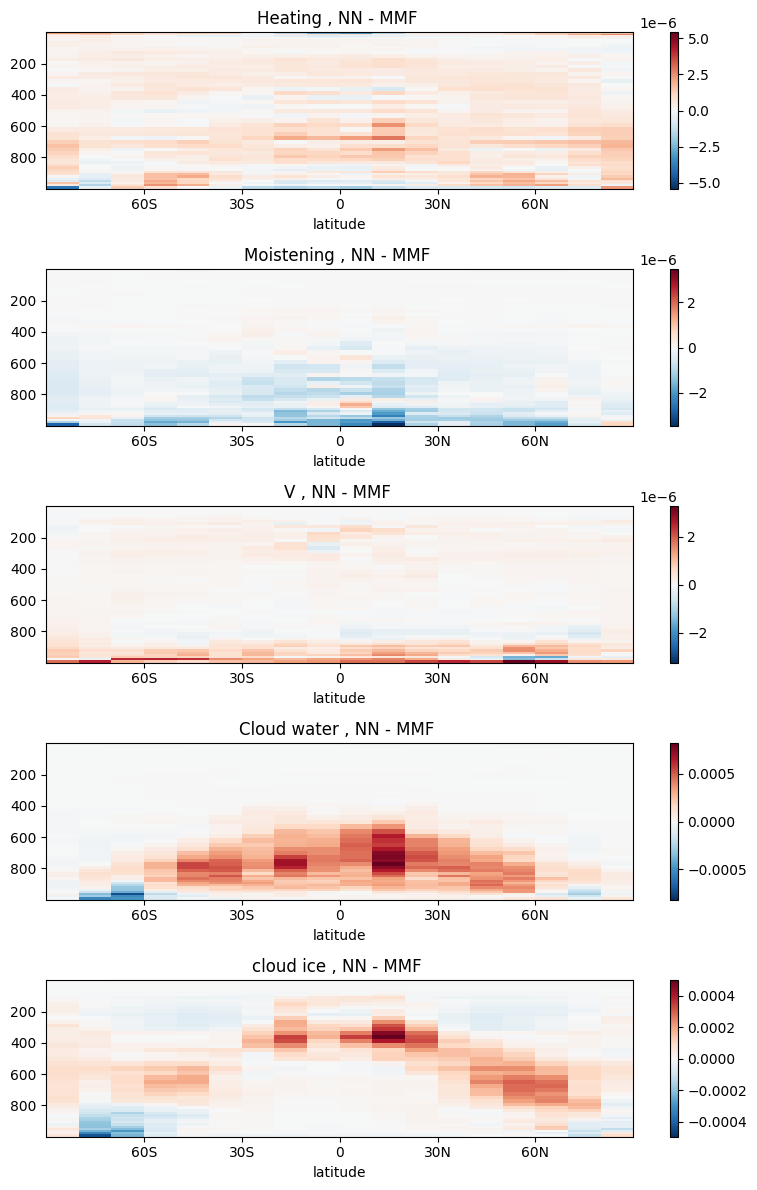

In [39]:
        
def zonal_mean_area_weighted(data, grid_area, lat):
    # Define latitude bins ranging from -90 to 90, each bin spans 10 degrees
    bins = np.arange(-90, 91, 10)  # Create edges for 10 degree bins

    # Get indices for each lat value indicating which bin it belongs to
    bin_indices = np.digitize(lat.values, bins) - 1

    # Initialize a list to store the zonal mean for each latitude bin
    data_zonal_mean = []

    # Iterate through each bin to calculate the weighted average
    for i in range(len(bins)-1):
        # Filter data and grid_area for current bin
        mask = (bin_indices == i)
        data_filtered = data[mask]
        grid_area_filtered = grid_area[mask]

        # Check if there's any data in this bin
        if data_filtered.size > 0:
            # Compute area-weighted average for the current bin
            weighted_mean = np.average(data_filtered, axis=0, weights=grid_area_filtered)
        else:
            # If no data in bin, append NaN or suitable value
            weighted_mean = np.nan

        # Append the result to the list
        data_zonal_mean.append(weighted_mean)

    # Convert list to numpy array
    data_zonal_mean = np.array(data_zonal_mean)

    # The mid points of the bins are used as the representative latitudes
    lats_mid = bins[:-1] + 5

    return data_zonal_mean, lats_mid


def plot_bias_diff(vars_stacked, grid_area, lat, level):
    import xarray as xr
    
    labels=["Heating","Moistening","V","Cloud water", "cloud ice"]
    scalings = [1,1000,1,1e6,1e6]
        
    latitude_ticks = [-60, -30, 0, 30, 60]
    latitude_labels = ['60S', '30S', '0', '30N', '60N']
    
    fig, axs = plt.subplots(len(vars_stacked), 1, figsize=(8, 12)) 
    
    for idx in range(len(vars_stacked)):
        var_diff = vars_stacked[idx]
        
        zm, lats_sorted = zonal_mean_area_weighted(var_diff, grid_area, lat)
                
        scaling = scalings[idx]
        data_diff = scaling * xr.DataArray(zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
            
        # Determine color scales
        vmax_diff = max(data_diff.max(), -data_diff.min())

        # Plot each variable in its row
    
        data_diff.plot(ax=axs[idx], add_colorbar=True, cmap='RdBu_r', vmin=-vmax_diff, vmax=vmax_diff)
        axs[idx].set_title("{} , {} ".format(labels[idx],'NN - MMF'))
        axs[idx].invert_yaxis()
        axs[idx].set_ylabel('')  # Clear the y-label to clean up plot
    
    for ax in axs:
        ax.set_xticks(latitude_ticks)  # Set the positions for the ticks
        ax.set_xticklabels(latitude_labels)  # Set the custom text labels
    plt.tight_layout()

    return fig
    #plt.tight_layout()
    #plt.show() 
    
dt_diff = dt_t_mean - dt_p_mean 
q_diff = q_t_mean- q_p_mean
v_diff = v_t_mean - v_p_mean
clw_diff = clw_t_mean - clw_p_mean
cli_diff = cli_t_mean - cli_p_mean

vars_stacked = [dt_diff, q_diff, v_diff, clw_diff, cli_diff]
fig = plot_bias_diff(vars_stacked, grid_area, lat, level)

In [64]:
# How correlated are the errors of the different members?            
dqt = y_true[:,:,:,1] # water vapor
dqt_mean = np.mean(dqt,axis=0)
dqp1 = outs_lev[0,:,:,:,1]
dqp2 = outs_lev[1,:,:,:,1]
dqp3 = outs_lev[2,:,:,:,1]

dqp1_er = dqt - dqp1 
dqp2_er = dqt - dqp2
dqp3_er = dqt - dqp3
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())
# newCRPS -prevt: 0.53197246
# newCRPS sumvar ens3 noprevt  0.549
# prevT  49330:   0.99683849
# same, autoreg:  0.97176491]

array([[1.        , 0.97176491],
       [0.97176491, 1.        ]])

In [34]:
# How correlated are the errors of the different members?            
dqt = y_true[:,:,:,1] # water vapor
dqt_mean = np.mean(dqt,axis=0)
dqp1 = outs_lev[0,:,:,:,1]
dqp2 = outs_lev[1,:,:,:,1]
dqp3 = outs_lev[2,:,:,:,1]

dqp1_er = dqt - dqp1 
dqp2_er = dqt - dqp2
dqp3_er = dqt - dqp3
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())

array([[1.        , 0.99994464],
       [0.99994464, 1.        ]])

In [34]:
dqp1_er.mean()

np.float32(-7.799384e-11)

In [24]:
# Error = true - pred AFTER removing bias
dqp_mean = np.mean(np.mean(outs_lev[:,:,:,:,1],axis=0),axis=0)
print(dqp_mean.shape)
bias_error = dqt_mean - dqp_mean

(384, 60)


In [28]:
dqp1_er = (dqt - bias_error) - dqp2
dqp2_er = (dqt - bias_error) - dqp2
dqp3_er = (dqt - bias_error) - dqp3
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())

array([[1., 1.],
       [1., 1.]])

In [36]:
dqp1_er = (dqt - dqp1) - bias_error
dqp2_er = (dqt - dqp2) - bias_error
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())

array([[1.        , 0.52781827],
       [0.52781827, 1.        ]])

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

    
def zonal_mean_area_weighted(data, grid_area, lat):
    # Define latitude bins ranging from -90 to 90, each bin spans 10 degrees
    bins = np.arange(-90, 91, 10)  # Create edges for 10 degree bins

    # Get indices for each lat value indicating which bin it belongs to
    bin_indices = np.digitize(lat.values, bins) - 1

    # Initialize a list to store the zonal mean for each latitude bin
    data_zonal_mean = []

    # Iterate through each bin to calculate the weighted average
    for i in range(len(bins)-1):
        # Filter data and grid_area for current bin
        mask = (bin_indices == i)
        data_filtered = data[mask]
        grid_area_filtered = grid_area[mask]

        # Check if there's any data in this bin
        if data_filtered.size > 0:
            # Compute area-weighted average for the current bin
            weighted_mean = np.average(data_filtered, axis=0, weights=grid_area_filtered)
        else:
            # If no data in bin, append NaN or suitable value
            weighted_mean = np.nan

        # Append the result to the list
        data_zonal_mean.append(weighted_mean)

    # Convert list to numpy array
    data_zonal_mean = np.array(data_zonal_mean)

    # The mid points of the bins are used as the representative latitudes
    lats_mid = bins[:-1] + 5

    return data_zonal_mean, lats_mid

def plot_dq_profile(y,yp,i,j,k):
    min_hpa = 300
    colorlist = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
    alpha=0.5
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(9.5, 4.5),
                            layout="constrained")
    icol=0
    axs[icol].plot(y[i,j,:,1],level,'k',linewidth=2)
    ymean = np.mean(yp[:,i,j,:,1],axis=0)
    axs[icol].plot(ymean,level,'--b',linewidth=2)

    nens = yp.shape[0]
    for im in range(nens):
        axs[icol].plot(yp[im,i,j,:,1],level,color=colorlist[im],alpha=alpha)
    axs[icol].legend(['True', 'Pred (ensemble mean)', 'Pred'])
    axs[icol].set_ylim(min_hpa,1000)
    # axs[icol].invert_yaxis()
    axs[icol].set_ylabel("Pressure (hPa)")
    axs[icol].set_xlabel("Water vapor tendency (kg/kg/s)")
    axs[icol].invert_yaxis()

    icol=1
    # axs[icol].plot(y[i,j,:,1],level,'k')
    axs[icol].plot(y[i,j,:,1]-ymean,level,'--b',linewidth=2)
    for im in range(nens):
        axs[icol].plot(y[i,j,:,1]-yp[im,i,j,:,1],level,color=colorlist[im],alpha=alpha)
    im=0
    # axs[icol].plot(y[i,j,:,1]-yp[im,i,j,:,1],level,"r")
    axs[icol].legend(['True - Pred (ensemble mean)','True - Pred'])
    axs[icol].set_ylim(min_hpa,1000)
    # axs[icol].invert_yaxis
    axs[icol].set_ylabel("Pressure (hPa)")
    axs[icol].set_xlabel("Water vapor tendency (kg/kg/s)")
    axs[icol].invert_yaxis()

    # axs[icol].set_yticks(level, minor=True)
    # axs[icol].grid(which="minor")

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ds_grid = xr.open_dataset(data_path+'data_grid/ne4pg2_scrip.nc')
grid_area = ds_grid['grid_area']

ds2 = xr.open_dataset(data_path+'data_grid/E3SM_ML.GNUGPU.F2010-MMF1.ne4pg2_ne4pg2.eam.h0.0001-01.nc')
lat = ds2.lat
lon = ds2.lon
level = ds2.lev.values


    


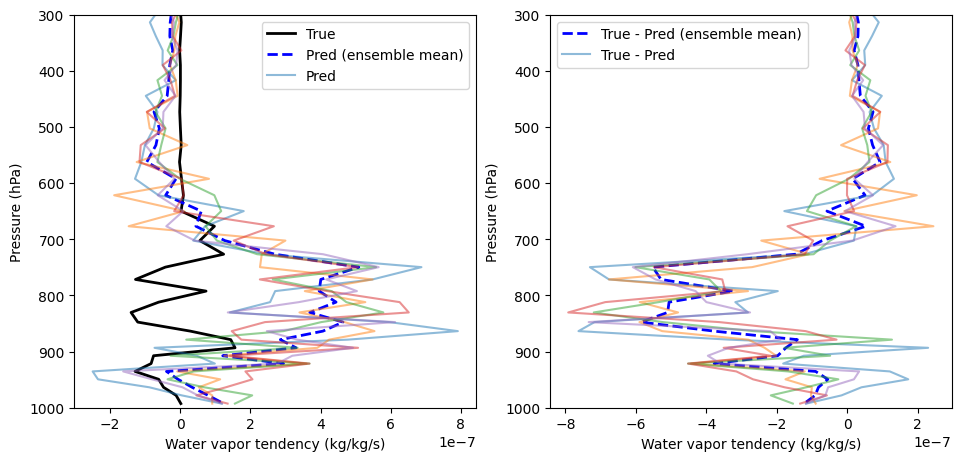

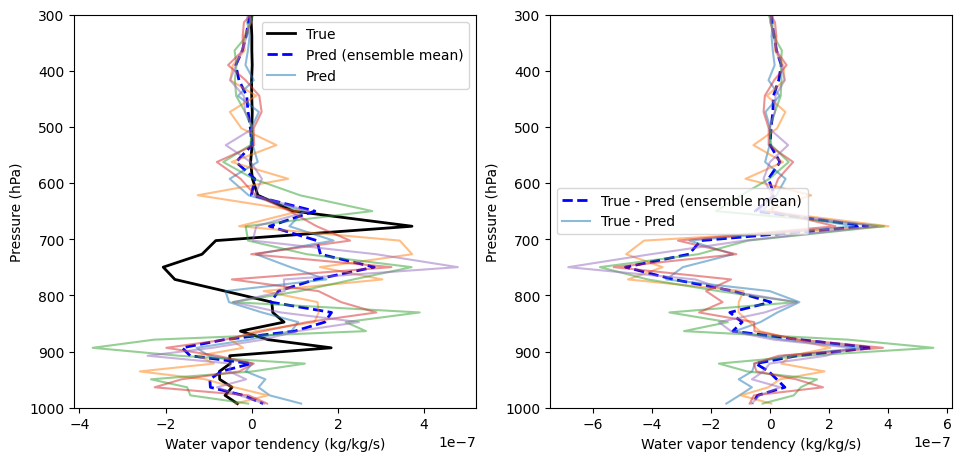

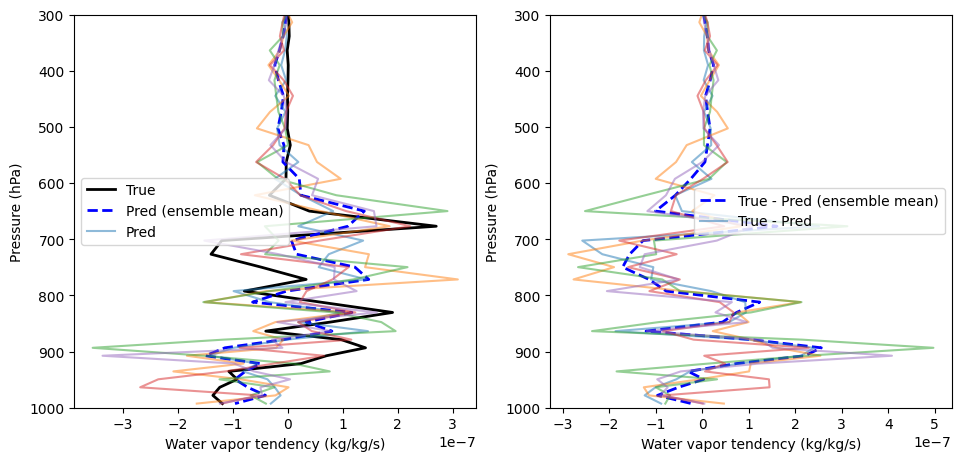

In [47]:
dq_pred = y_pred[:,:,:,1]
dq_true = y_true[:,:,:,1]

ind = np.unravel_index(dq_true.argmax(), dq_true.shape)
ind = np.unravel_index(dq_pred.argmax(), dq_pred.shape)

i,j,k = ind

plot_dq_profile(y_true,outs_lev,i,j,k)
plot_dq_profile(y_true,outs_lev,i+1,j,k)
plot_dq_profile(y_true,outs_lev,i+2,j,k)


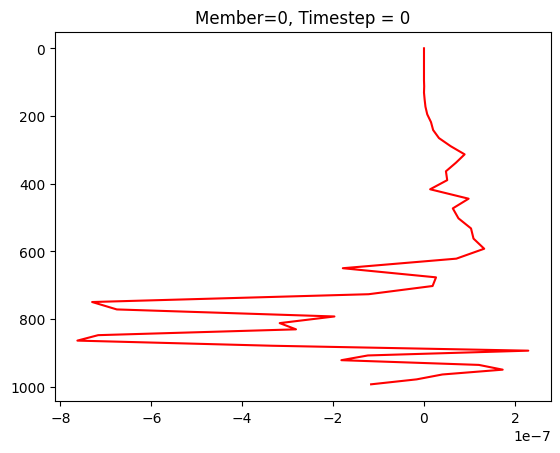

In [49]:

import matplotlib.animation as animation

fig, ax = plt.subplots()

im=0
jtime = 0 
timestep = i + jtime
line, = ax.plot(y_true[i,j,:,1]-outs_lev[im,i,j,:,1],level,"r")
ax.set_title('Member=0, Timestep = {}'.format(0))
ax.invert_yaxis()

def animate(jtime):
    line.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[im,i+jtime,j,:,1])  # update the data.
    ax.set_title('Error for Member=0, Timestep = {}'.format(jtime+1))
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=10,interval=1000) # interval=20, blit=True, save_count=50)
plt.show()


/data/piptorch/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


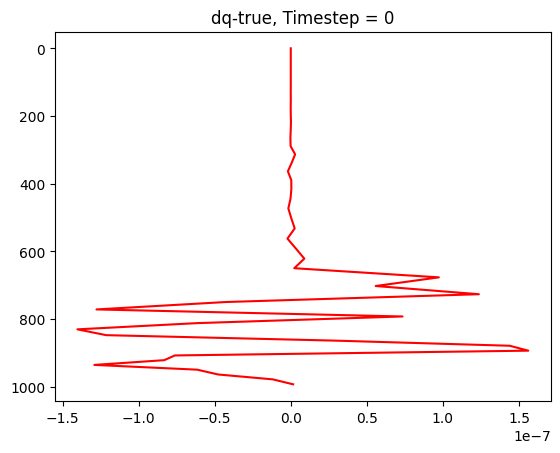

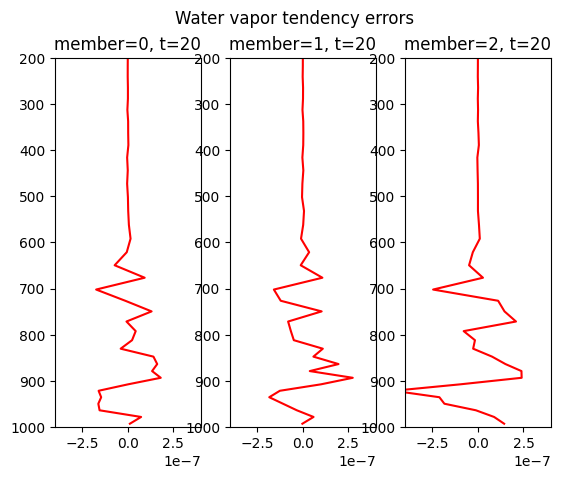

In [50]:
fig, ax = plt.subplots()
im=0
jtime = 0 
timestep = i + jtime
line, = ax.plot(y_true[i,j,:,1],level,"r")
ax.set_title('dq-true, Timestep = {}'.format(0))
ax.invert_yaxis()

def animate(jtime):
    line.set_xdata(y_true[i+jtime,j,:,1])  # update the data.
    ax.set_title('dq-true, Timestep = {}'.format(jtime+1))
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=10,interval=1000) # interval=20, blit=True, save_count=50)
plt.show()


fig, ax = plt.subplots(ncols=3)
fig.suptitle("Water vapor tendency errors")
im=0
jtime = 0 
min_hpa = 200
line, = ax[0].plot(y_true[i,j,:,1]-outs_lev[0,i,j,:,1],level,"r")
line2, = ax[1].plot(y_true[i,j,:,1]-outs_lev[1,i,j,:,1],level,"r")
line3, = ax[2].plot(y_true[i,j,:,1]-outs_lev[2,i,j,:,1],level,"r")

ax[0].set_title('member={}, t={}'.format(0,jtime))
ax[1].set_title('member={}, t={}'.format(1,jtime))
ax[2].set_title('member={}, t={}'.format(2,jtime))

ax[0].set_ylim(min_hpa,1000); ax[1].set_ylim(min_hpa,1000); ax[2].set_ylim(min_hpa,1000)
ax[0].invert_yaxis(); ax[1].invert_yaxis(); ax[2].invert_yaxis()
ax[0].set_xlim([-4.0e-7,4.0e-7]); ax[1].set_xlim([-4.0e-7,4.0e-7]); ax[2].set_xlim([-4.0e-7,4.0e-7])

def animate(jtime):
    line.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[0,i+jtime,j,:,1])  # update the data.
    ax[0].set_title('member={}, t={}'.format(0,jtime+1))
    line2.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[1,i+jtime,j,:,1])  # update the data.
    ax[1].set_title('member={}, t={}'.format(1,jtime+1))
    line3.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[2,i+jtime,j,:,1])  # update the data.
    ax[2].set_title('member={}, t={}'.format(2,jtime+1))
    return line,line2, line3

# ani = animation.FuncAnimation(
#     fig, animate, frames=10,interval=1000) # interval=20, blit=True, save_count=50)

ani = animation.FuncAnimation(
    fig, animate, frames=20,interval=1500) # interval=20, blit=True, save_count=50)

writergif = animation.PillowWriter(fps=1)
ani.save('/data/gdrive/postdoc/results/ClimSim/anim_srnn_errors_newcrps_noprevt.gif',writer=writergif)


plt.show()


In [24]:
if nens>1:
    stochastic=True
else:
    stochsatic=False 
    
labels=["Heating","Moistening","V","Cloud water", "cloud ice"]
scalings = [1,1000,1,1e6,1e6]

# max_diffs = [40,5]

latitude_ticks = [-60, -30, 0, 30, 60]
latitude_labels = ['60S', '30S', '0', '30N', '60N']

# zonal plots of BIAS, MAE 
qn_true = y_true[:,:,:,2]  + y_true[:,:,:,3]
qn_pred = y_pred[:,:,:,2]  + y_pred[:,:,:,3]

mae_dt = np.mean(np.abs(y_true[:,:,:,0] - y_pred[:,:,:,0]),axis=0)
mae_dq = np.mean(np.abs(y_true[:,:,:,1] - y_pred[:,:,:,1]),axis=0)
mae_clw = np.mean(np.abs(y_true[:,:,:,2] - y_pred[:,:,:,2]),axis=0)
mae_cli = np.mean(np.abs(y_true[:,:,:,3] - y_pred[:,:,:,3]),axis=0)
mae_qn = np.mean(np.abs(qn_true - qn_pred),axis=0)

R2_dt = np.zeros((384,60))
R2_dq = np.zeros((384,60))
R2_clw = np.zeros((384,60))
R2_cli = np.zeros((384,60))
#R2_qn = np.zeros((384,60))

def rmse(pred, true):
    return np.sqrt(np.mean(np.square(pred-true),axis=1))
    
# https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2023MS004019
# spread is taken as the square roof of the mean ensemble variance
# skill is taken as the ensemble mean RMSE
T850_spread = np.sqrt(np.mean(T850_var,axis=1))
if stochastic:
    z_mean_fac_dt = np.zeros((384,60)) 
    z_mean_fac_dq = np.zeros((384,60)) 
    z_mean_fac_clw = np.zeros((384,60)) 
    z_mean_fac_cli = np.zeros((384,60)) 
    
    spreadskill_dt = np.zeros((384,60)) 
    spreadskill_dq = np.zeros((384,60)) 
    spreadskill_clw = np.zeros((384,60)) 
    spreadskill_cli = np.zeros((384,60)) 
    
mean_abs_dt = np.zeros((384,60))
mean_abs_dq = np.zeros((384,60))
mean_abs_clw = np.zeros((384,60))
mean_abs_cli = np.zeros((384,60))

for i in range(384): 
    for j in range(60):
        R2_dt[i,j] =  np.corrcoef(y_true[:,i,j,0], y_pred[:,i,j,0])[0,1]**2
        R2_dq[i,j] =  np.corrcoef(y_true[:,i,j,1], y_pred[:,i,j,1])[0,1]**2
        R2_clw[i,j] =  np.corrcoef(y_true[:,i,j,2], y_pred[:,i,j,2])[0,1]**2
        R2_cli[i,j] =  np.corrcoef(y_true[:,i,j,3], y_pred[:,i,j,3])[0,1]**2
      #  R2_qn[i,j] =  np.corrcoef(qn_true[:,i,j], qn_pred[:,i,j])[0,1]**2
      
        mean_abs_dt[i,j] = np.mean(np.abs(y_true[:,i,j,0]))
        mean_abs_dq[i,j] = np.mean(np.abs(y_true[:,i,j,1]))
        mean_abs_clw[i,j] = np.mean(np.abs(y_true[:,i,j,2]))
        mean_abs_cli[i,j] = np.mean(np.abs(y_true[:,i,j,3])) 
        
        if stochastic:
            z_mean_fac_dt[i,j] =  np.mean(outs_lev_std[:,i,j,0]) / np.mean(np.abs(y_pred[:,i,j,0]))
            z_mean_fac_dq[i,j] =  np.mean(outs_lev_std[:,i,j,1])  / np.mean(np.abs(y_pred[:,i,j,1]))
            z_mean_fac_clw[i,j] =  np.mean(outs_lev_std[:,i,j,2])  / np.mean(np.abs(y_pred[:,i,j,2]))
            z_mean_fac_cli[i,j] =  np.mean(outs_lev_std[:,i,j,3])  / np.mean(np.abs(y_pred[:,i,j,3]))

# z = outs_lev - outs_lev_det

if stochastic:
    z_mean_fac_clw[z_mean_fac_clw>100] = np.nan
    z_mean_fac_cli[z_mean_fac_cli>100] = np.nan




/data/piptorch/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/tmp/ipykernel_1871268/4007760742.py:55: RuntimeWarning: invalid value encountered in scalar divide
  z_mean_fac_dq[i,j] =  np.mean(outs_lev_std[:,i,j,1])  / np.mean(np.abs(y_pred[:,i,j,1]))
/tmp/ipykernel_1871268/4007760742.py:56: RuntimeWarning: invalid value encountered in scalar divide
  z_mean_fac_clw[i,j] =  np.mean(outs_lev_std[:,i,j,2])  / np.mean(np.abs(y_pred[:,i,j,2]))
/tmp/ipykernel_1871268/4007760742.py:57: RuntimeWarning: invalid value encountered in scalar divide
  z_mean_fac_cli[i,j] =  np.mean(outs_lev_std[:,i,j,3])  / np.mean(np.abs(y_pred[:,i,j,3]))
/data/piptorch/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


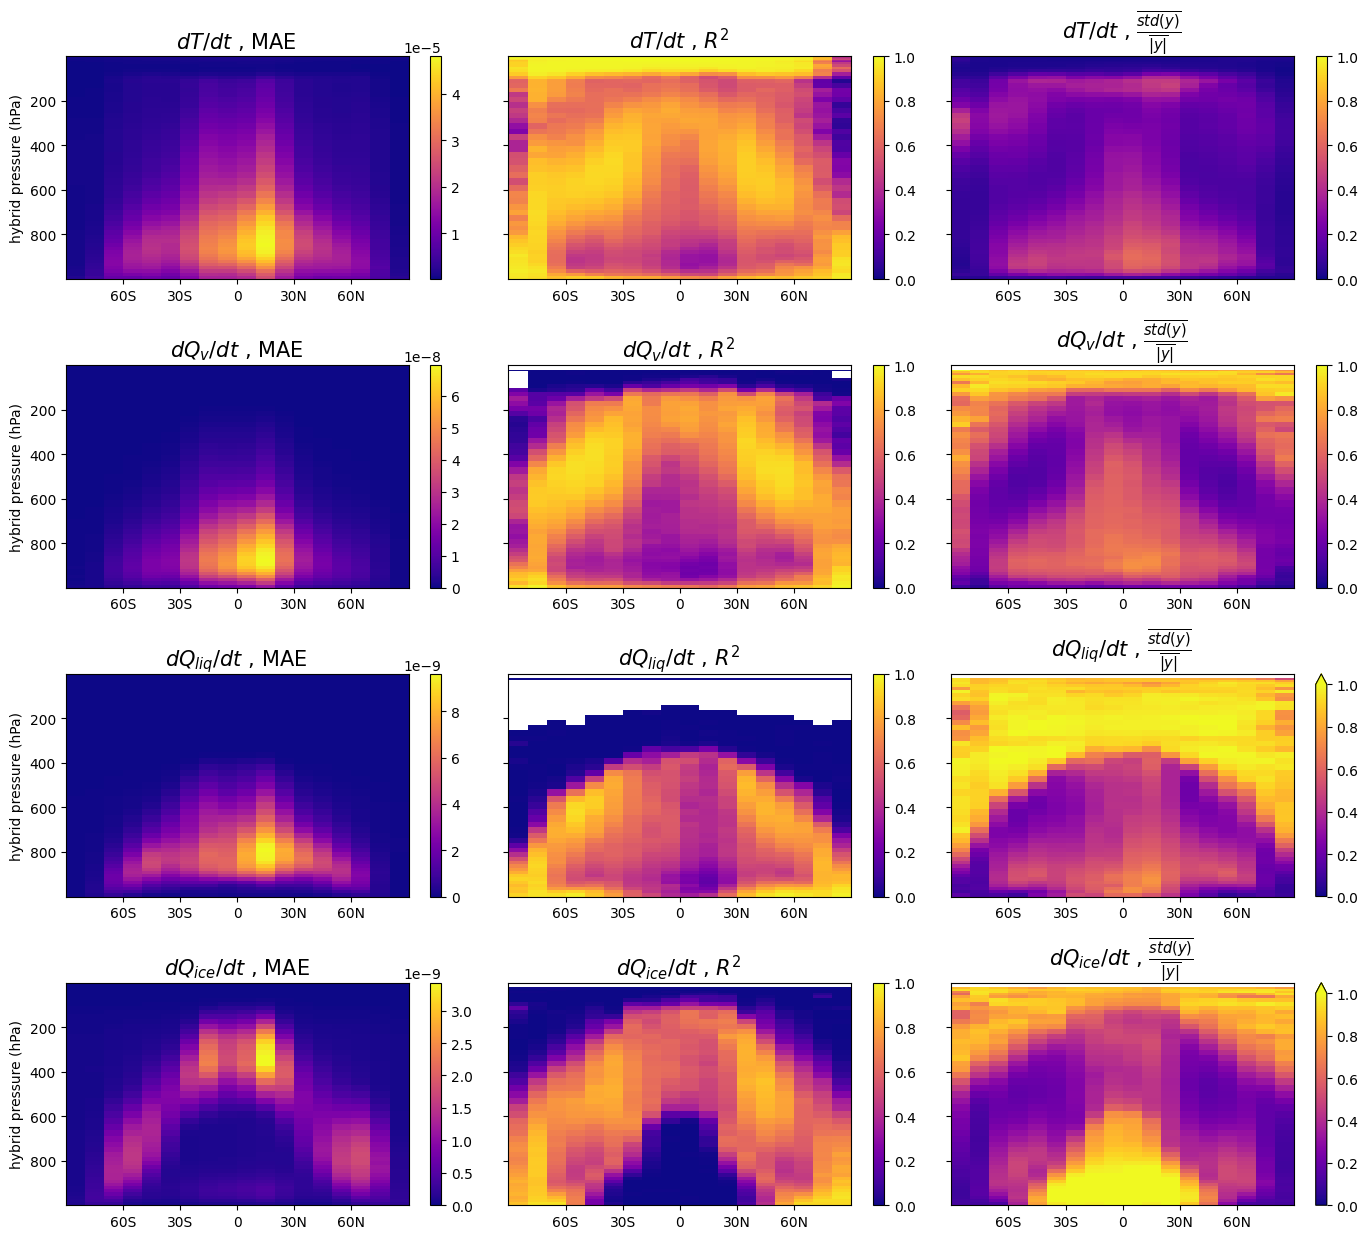

In [25]:
fs_label = 15

if stochastic:
    vars_stacked2 = [[mae_dt,R2_dt, z_mean_fac_dt], 
                     [mae_dq,R2_dq, z_mean_fac_dq], 
                    [mae_clw,R2_clw, z_mean_fac_clw], 
                    [mae_cli,R2_cli, z_mean_fac_cli]]#,
                     # [mae_qn,R2_qn]]
    
    labels2=[r"$dT/dt$", r"$dQ_v/dt$", r"$dQ_{liq}/dt$", r"$dQ_{ice}/dt$"]
    
    fig, axs = plt.subplots(len(vars_stacked2), 3, figsize=(14, 12.5)) 
    
    for idx in range(len(vars_stacked2)):
        # var_mae, var_r2, var_y, var_z = vars_stacked2[idx]
        var_mae, var_r2, var_z = vars_stacked2[idx]

        mae_zm, lats_sorted = zonal_mean_area_weighted(var_mae, grid_area, lat)
        r2_zm, lats_sorted = zonal_mean_area_weighted(var_r2, grid_area, lat)
        # y_zm, lats_sorted = zonal_mean_area_weighted(var_y, grid_area, lat)
        z_zm, lats_sorted = zonal_mean_area_weighted(var_z, grid_area, lat)

        # data_sp, data_nn = 1e6*sp_zm.T, 1e6*nn_zm.T
        
        scaling = 1
        data_mae = scaling * xr.DataArray(mae_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        data_r2 = scaling * xr.DataArray(r2_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        # data_y = scaling * xr.DataArray(y_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
        #                                  coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})        
        data_z = scaling * xr.DataArray(z_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})           
        # Determine color scales
        vmax1 = data_mae.max()
        vmin1 = data_mae.min()
        vmax2 = 1.0
        vmin2 = 0.0
        
        data_mae.plot(ax=axs[idx, 0], add_colorbar=True, cmap='plasma', vmin=vmin1, vmax=vmax1)
        # axs[idx, 0].set_title(f'{labels[idx * 3]} {var_title} ({unit}): MMF')
        axs[idx, 0].set_title("{} , {} ".format(labels2[idx],'MAE'),fontsize=fs_label)
        axs[idx, 0].invert_yaxis()

        data_r2.plot(ax=axs[idx, 1], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 1].set_title("{} , {} ".format(labels2[idx], r'$R^2$'),fontsize=fs_label)
        axs[idx, 1].invert_yaxis()
        axs[idx, 1].set_ylabel('')  # Clear the y-label to clean up plot
        
        # data_y.plot(ax=axs[idx, 2], add_colorbar=True, cmap='plasma')#, vmin=vmin2, vmax=vmax2)
        # axs[idx, 2].set_title("{} , {} ".format(labels2[idx], r'mean(y)'))
        # axs[idx, 2].invert_yaxis()
        # axs[idx, 2].set_ylabel('')  # Clear the y-label to clean up plot
        
        data_z.plot(ax=axs[idx, 2], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 2].set_title("{} , {} ".format(labels2[idx], r"$\frac{\overline{std(y)}}{\overline{|y|}}$"),fontsize=fs_label)
        axs[idx, 2].invert_yaxis()
        axs[idx, 2].set_ylabel('')  # Clear the y-label to clean up plot

        # if idx < (len(vars_stacked2)-1):
        axs[idx, 0].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 1].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 2].set_xlabel('')  # Clear the y-label to clean up plot

        axs[idx, 1].set_yticklabels('')
        axs[idx, 2].set_yticklabels('')

    # Set these ticks and labels for each subplot
    for ax_row in axs:
        for ax in ax_row:
            ax.set_xticks(latitude_ticks)  # Set the positions for the ticks
            ax.set_xticklabels(latitude_labels)  # Set the custom text labels
    plt.tight_layout()
    plt.show() 

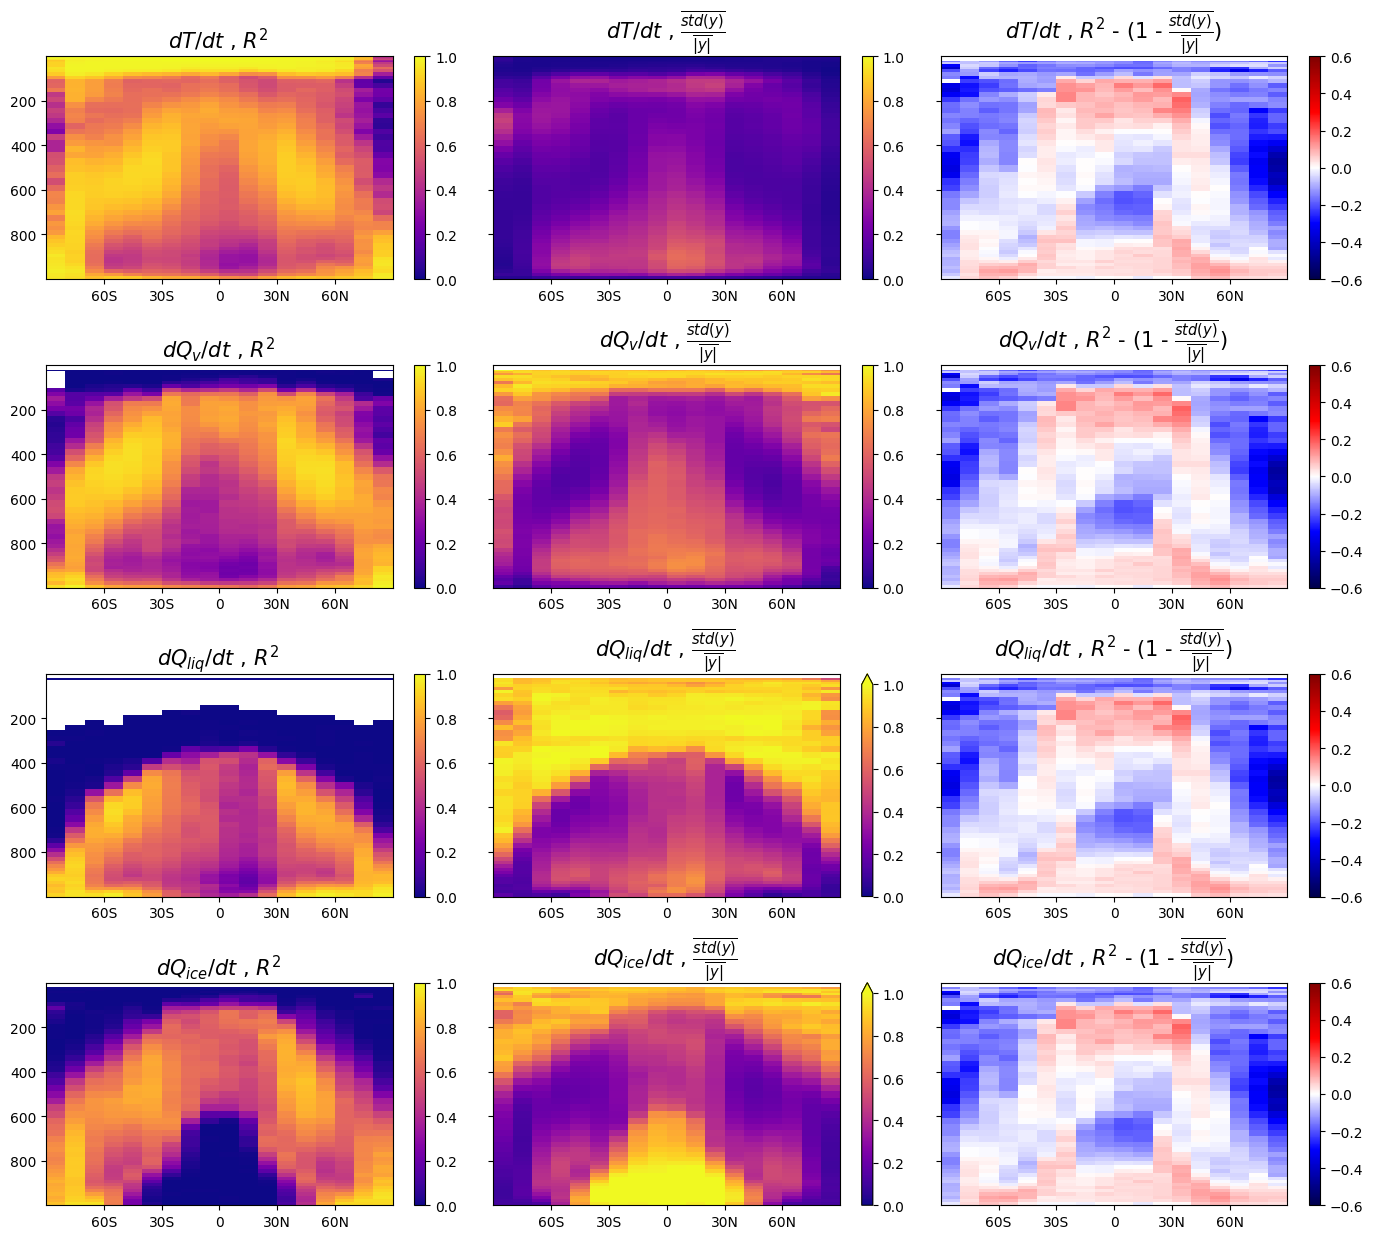

In [26]:
data_var3 = data_r2 - (1-data_z)

if stochastic:

    labels2=[r"$dT/dt$", r"$dQ_v/dt$", r"$dQ_{liq}/dt$", r"$dQ_{ice}/dt$"]
    
    fig, axs = plt.subplots(len(vars_stacked2), 3, figsize=(14, 12.5)) 
    
    for idx in range(len(vars_stacked2)):
        # var_mae, var_r2, var_y, var_z = vars_stacked2[idx]
        var_mae, var_r2, var_z = vars_stacked2[idx]

        mae_zm, lats_sorted = zonal_mean_area_weighted(var_mae, grid_area, lat)
        r2_zm, lats_sorted = zonal_mean_area_weighted(var_r2, grid_area, lat)
        # y_zm, lats_sorted = zonal_mean_area_weighted(var_y, grid_area, lat)
        z_zm, lats_sorted = zonal_mean_area_weighted(var_z, grid_area, lat)

        # data_sp, data_nn = 1e6*sp_zm.T, 1e6*nn_zm.T
        
        scaling = 1
        data_mae = scaling * xr.DataArray(mae_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        data_r2 = scaling * xr.DataArray(r2_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        # data_y = scaling * xr.DataArray(y_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
        #                                  coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})        
        data_z = scaling * xr.DataArray(z_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})           
        # Determine color scales
        vmax2 = 1.0
        vmin2 = 0.0
        vmax3 = 0.6
        vmin3 = -0.6
        
        data_r2.plot(ax=axs[idx, 0], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 0].set_title("{} , {} ".format(labels2[idx], r'$R^2$'),fontsize=fs_label)
        axs[idx, 0].invert_yaxis()
        axs[idx, 0].set_ylabel('')  # Clear the y-label to clean up plot
        
        data_z.plot(ax=axs[idx, 1], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 1].set_title("{} , {} ".format(labels2[idx], r"$\frac{\overline{std(y)}}{\overline{|y|}}$"),fontsize=fs_label)
        axs[idx, 1].invert_yaxis()
        axs[idx, 1].set_ylabel('')  # Clear the y-label to clean up plot

        data_var3.plot(ax=axs[idx, 2], add_colorbar=True, cmap='seismic', vmin=vmin3, vmax=vmax3)
        axs[idx, 2].set_title("{} , {} ".format(labels2[idx], r"$R^2$ - (1 - $\frac{\overline{std(y)}}{\overline{|y|}})$"),fontsize=fs_label)
        axs[idx, 2].invert_yaxis()
        axs[idx, 2].set_ylabel('')  # Clear the y-label to clean up plot

        axs[idx, 0].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 1].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 2].set_xlabel('')  # Clear the y-label to clean up plot

        axs[idx, 1].set_yticklabels('')
        axs[idx, 2].set_yticklabels('')

    # Set these ticks and labels for each subplot
    for ax_row in axs:
        for ax in ax_row:
            ax.set_xticks(latitude_ticks)  # Set the positions for the ticks
            ax.set_xticklabels(latitude_labels)  # Set the custom text labels
    plt.tight_layout()
    plt.show() 